# Module : Decision Tree in cybesecurity                  
                        


In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### REPORT OF TEST OF THE BEST ACCURACY USING DIFFERENTS HYPERPARAMETERS FOR DECISION TREE

## 1. Sources of Cybersecurity Data
Typical sources of data used in cybersecurity include:

In [95]:
# Load a sample from CICIDS2017 (must be downloaded beforehand)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(43)  # For reproducibility
# Replace with actual path if you have the dataset
logs_df= pd.read_csv("CICIDS2017_sample.csv")
logs_df


Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                  4                  2                       0   
1             142377                 46                      62   
2             118873                 23                      28   
3             143577                 43                      55   
4             143745                 49                      59   
...              ...                ...                     ...   
56656            234                  2                       2   
56657         133288                  2                       2   
56658       11507694                  5                       4   
56659       11507707                  8                       6   
56660       11512204                  8                       5   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                               37                            0   
1                             1325                       105855   
2                             1169                        45025   
3                             1301                       107289   
4                             1331                       110185   
...                            ...                          ...   
56656                           64                          232   
56657                           94                          482   
56658                          450                         3525   
56659                          416                        11632   
56660                          326                        11632   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                         31                      6               18.500000   
1                        570                      0               28.804348   
2                        570                      0               50.826087   
3                        570                      0               30.255814   
4                        570                      0               27.163265   
...                      ...                    ...                     ...   
56656                     32                     32               32.000000   
56657                     47                     47               47.000000   
56658                    450                      0               90.000000   
56659                    416                      0               52.000000   
56660                    326                      0               40.750000   

       Fwd Packet Length Std  Bwd Packet Length Max  ...  \
0                  17.677670                      0  ...   
1                 111.407285                   4344  ...   
2                 156.137367                   2896  ...   
3                 115.178969                   4344  ...   
4                 108.067176                   4344  ...   
...                      ...                    ...  ...   
56656               0.000000                    116  ...   
56657               0.000000                    241  ...   
56658             201.246118                   3525  ...   
56659             147.078211                   5792  ...   
56660             115.258405                  10184  ...   

       min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                        20          0.0         0.0           0           0   
1                        20          0.0         0.0           0           0   
2                        32          0.0         0.0           0           0   
3                        20          0.0         0.0           0           0   
4                        20          0.0         0.0           0           0   
...                     ...          ...         ...         ...         ...   
56656                    32          0.0         0.0           0           0   
56657                    32          0.0         0.0           0           0   
56658  

## Step 1: Data Profiling

In [114]:
from scipy import stats  # Import stats from scipy

# Profile the dataset
print("Basic Info:")
print(logs_df.info())

print("\nDescriptive Statistics:")
print(logs_df.describe(include='all'))

print("\nMissing Values:")
print(logs_df.isnull().sum())

print("\nUnique values in each column:")
print(logs_df.nunique())

print("Duplicates:")
print(logs_df.duplicated().sum())


# Select numeric columns only
numeric_cols = logs_df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_cols))

# Count outliers (values with z-score > 7)
outliers = (z_scores > 7)
num_outliers = np.sum(outliers)

print(f"Number of outliers: {num_outliers}")



Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 56580 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56580 non-null  int64  
 1   Total Fwd Packets            56580 non-null  int64  
 2   Total Backward Packets       56580 non-null  int64  
 3   Total Length of Fwd Packets  56580 non-null  int64  
 4   Total Length of Bwd Packets  56580 non-null  int64  
 5   Fwd Packet Length Max        56580 non-null  int64  
 6   Fwd Packet Length Min        56580 non-null  int64  
 7   Fwd Packet Length Mean       56580 non-null  float64
 8   Fwd Packet Length Std        56580 non-null  float64
 9   Bwd Packet Length Max        56580 non-null  int64  
 10  Bwd Packet Length Min        56580 non-null  int64  
 11  Bwd Packet Length Mean       56580 non-null  float64
 12  Bwd Packet Length Std        56580 non-null  float64
 13  Flow Byte

## Step 2: Data Cleaning

In [25]:
from scipy import stats
import numpy as np

# Replace empty strings and inconsistent protocol names
logs_df.replace("", np.nan, inplace=True)

# Drop rows with critical missing or invalid Flow Duration

logs_df = logs_df[logs_df['Flow Duration'] > 0].dropna(subset=['Flow Duration'])
# Drop rows with critical missing or invalid Total Fwd Packets
df = logs_df[logs_df['Total Fwd Packets'] > 0].dropna(subset=['Total Fwd Packets'])

# Fix missing values in numerical columns by filling with the median
numerical_cols = logs_df.select_dtypes(include=['float64', 'int64']).columns
logs_df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
logs_df.reset_index(drop=True, inplace=True)

# Remove duplicates rows
logs_df = logs_df.drop_duplicates()

# Remove duplicates columns
logs_df = logs_df.T.drop_duplicates().T

logs_df


Flow Duration Total Fwd Packets Total Backward Packets  \
0                 4                 2                      0   
1            142377                46                     62   
2            118873                23                     28   
3            143577                43                     55   
4            143745                49                     59   
...             ...               ...                    ...   
56575           234                 2                      2   
56576        133288                 2                      2   
56577      11507694                 5                      4   
56578      11507707                 8                      6   
56579      11512204                 8                      5   

      Total Length of Fwd Packets Total Length of Bwd Packets  \
0                              37                           0   
1                            1325                      105855   
2                            1169                       45025   
3                            1301                      107289   
4                            1331                      110185   
...                           ...                         ...   
56575                          64                         232   
56576                          94                         482   
56577                         450                        3525   
56578                         416                       11632   
56579                         326                       11632   

      Fwd Packet Length Max Fwd Packet Length Min Fwd Packet Length Mean  \
0                        31                     6                   18.5   
1                       570                     0              28.804348   
2                       570                     0              50.826087   
3                       570                     0              30.255814   
4                       570                     0              27.163265   
...                     ...                   ...                    ...   
56575                    32                    32                   32.0   
56576                    47                    47                   47.0   
56577                   450                     0                   90.0   
56578                   416                     0                   52.0   
56579                   326                     0                  40.75   

      Fwd Packet Length Std Bwd Packet Length Max  ... min_seg_size_forward  \
0                  17.67767                     0  ...                   20   
1                111.407285                  4344  ...                   20   
2                156.137367                  2896  ...                   32   
3                115.178969                  4344  ...                   20   
4                108.067176                  4344  ...                   20   
...                     ...                   ...  ...                  ...   
56575                   0.0                   116  ...                   32   
56576                   0.0                   241  ...                   32   
56577            201.246118                  3525  ...                   32   
56578            147.078211                  5792  ...                   32   
56579            115.258405                 10184  ...                   32   

      Active Mean Active Std Active Max Active Min  Idle Mean Idle Std  \
0             0.0        0.0          0          0        0.0      0.0   
1             0.0        0.0          0          0        0.0      0.0   
2             0.0        0.0          0          0        0.0      0.0   
3             0.0        0.0          0          0        0.0      0.0   
4             0.0        0.0          0          0        0.0      0.0   
...           ...        ...        ...        ...        ...      ...   
56575         0.0        0.0          0          0        0.0      0.0   
56

## Encode Categorical columns

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode 'Label' column
if 'Label' in logs_df.columns:
    logs_df['Label'] = le.fit_transform(logs_df['Label'])
logs_df

Flow Duration Total Fwd Packets Total Backward Packets  \
0                 4                 2                      0   
1            142377                46                     62   
2            118873                23                     28   
3            143577                43                     55   
4            143745                49                     59   
...             ...               ...                    ...   
56575           234                 2                      2   
56576        133288                 2                      2   
56577      11507694                 5                      4   
56578      11507707                 8                      6   
56579      11512204                 8                      5   

      Total Length of Fwd Packets Total Length of Bwd Packets  \
0                              37                           0   
1                            1325                      105855   
2                            1169                       45025   
3                            1301                      107289   
4                            1331                      110185   
...                           ...                         ...   
56575                          64                         232   
56576                          94                         482   
56577                         450                        3525   
56578                         416                       11632   
56579                         326                       11632   

      Fwd Packet Length Max Fwd Packet Length Min Fwd Packet Length Mean  \
0                        31                     6                   18.5   
1                       570                     0              28.804348   
2                       570                     0              50.826087   
3                       570                     0              30.255814   
4                       570                     0              27.163265   
...                     ...                   ...                    ...   
56575                    32                    32                   32.0   
56576                    47                    47                   47.0   
56577                   450                     0                   90.0   
56578                   416                     0                   52.0   
56579                   326                     0                  40.75   

      Fwd Packet Length Std Bwd Packet Length Max  ... min_seg_size_forward  \
0                  17.67767                     0  ...                   20   
1                111.407285                  4344  ...                   20   
2                156.137367                  2896  ...                   32   
3                115.178969                  4344  ...                   20   
4                108.067176                  4344  ...                   20   
...                     ...                   ...  ...                  ...   
56575                   0.0                   116  ...                   32   
56576                   0.0                   241  ...                   32   
56577            201.246118                  3525  ...                   32   
56578            147.078211                  5792  ...                   32   
56579            115.258405                 10184  ...                   32   

      Active Mean Active Std Active Max Active Min  Idle Mean Idle Std  \
0             0.0        0.0          0          0        0.0      0.0   
1             0.0        0.0          0          0        0.0      0.0   
2             0.0        0.0          0          0        0.0      0.0   
3             0.0        0.0          0          0        0.0      0.0   
4             0.0        0.0          0          0        0.0      0.0   
...           ...        ...        ...        ...        ...      ...   
56575         0.0        0.0          0          0        0.0      0.0   
56

# Data visualization

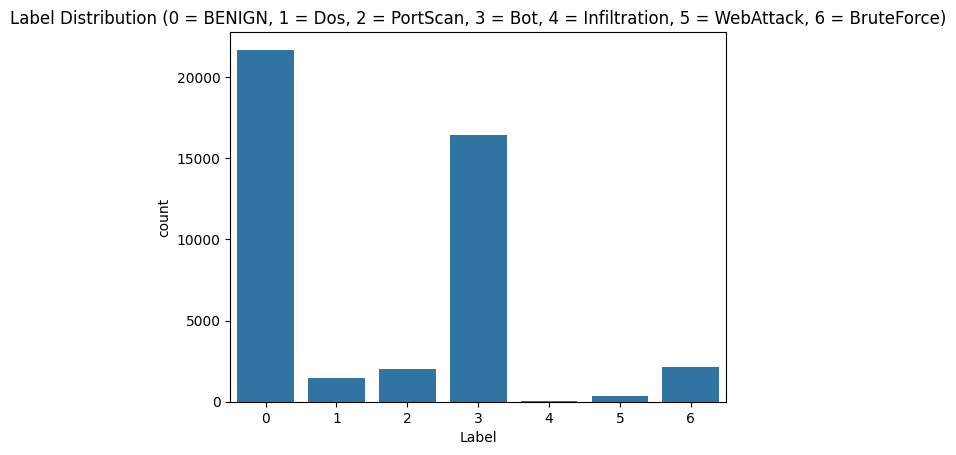

In [10]:
# Visualize Attack distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Label', data=logs_df).set_title('Label Distribution')
plt.title('Label Distribution (0 = BENIGN, 1 = Dos, 2 = PortScan, 3 = Bot, 4 = Infiltration, 5 = WebAttack, 6 = BruteForce)')
plt.show()

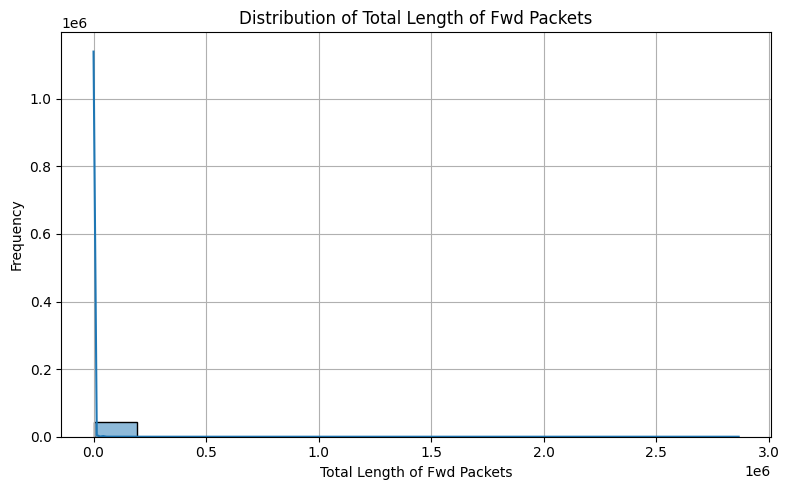

In [26]:
# Plot the distribution of by Total Length of Fwd Packets
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(logs_df['Total Length of Fwd Packets'], bins=15, kde=True)
plt.title('Distribution of Total Length of Fwd Packets')
plt.xlabel('Total Length of Fwd Packets')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

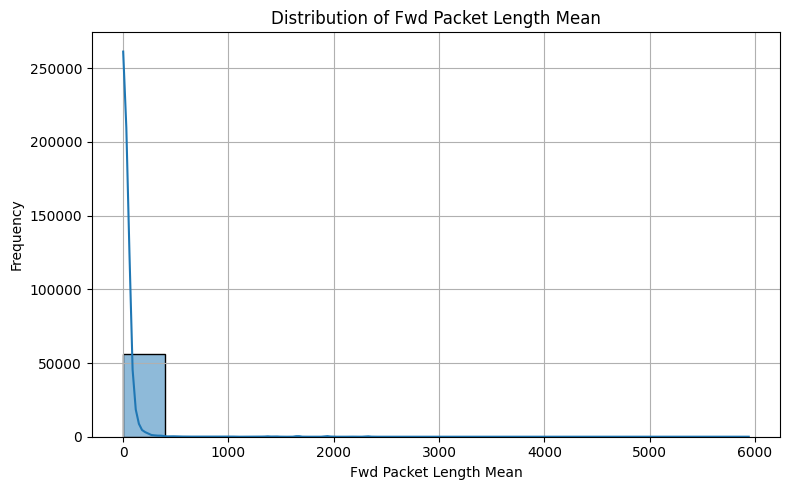

In [115]:
# Plot the distribution of by Fwd Packet Length Mean
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(logs_df['Fwd Packet Length Mean'], bins=15, kde=True)
plt.title('Distribution of Fwd Packet Length Mean')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

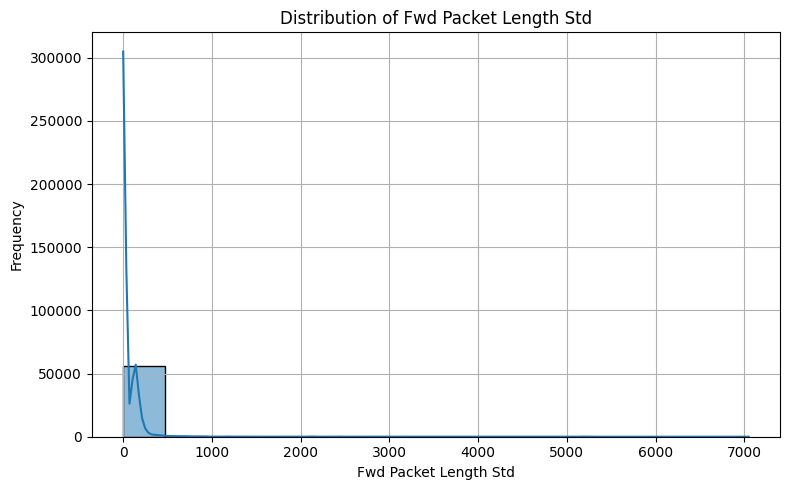

In [116]:
# Plot the distribution of by Fwd Packet Length Std
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(logs_df['Fwd Packet Length Std'], bins=15, kde=True)
plt.title('Distribution of Fwd Packet Length Std')
plt.xlabel('Fwd Packet Length Std')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

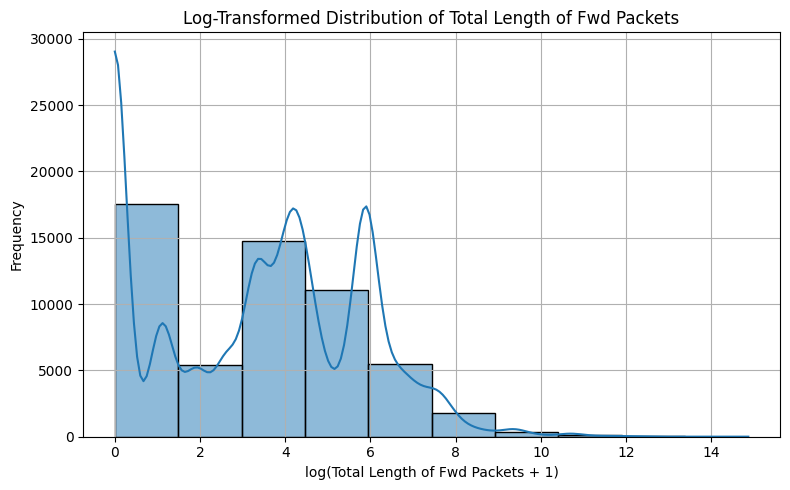

In [117]:
# Optional: Log-transformed version of the distribution of Total Length of Fwd Packets
plt.figure(figsize=(8, 5))
# Ensure the column is numeric
logs_df['Total Length of Fwd Packets'] = pd.to_numeric(logs_df['Total Length of Fwd Packets'], errors='coerce')

# Drop rows with NaN values in the column (if any)
logs_df = logs_df.dropna(subset=['Total Length of Fwd Packets'])

# Apply log transformation
sns.histplot(np.log1p(logs_df['Total Length of Fwd Packets']), bins=10, kde=True)
plt.title('Log-Transformed Distribution of Total Length of Fwd Packets')
plt.xlabel('log(Total Length of Fwd Packets + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


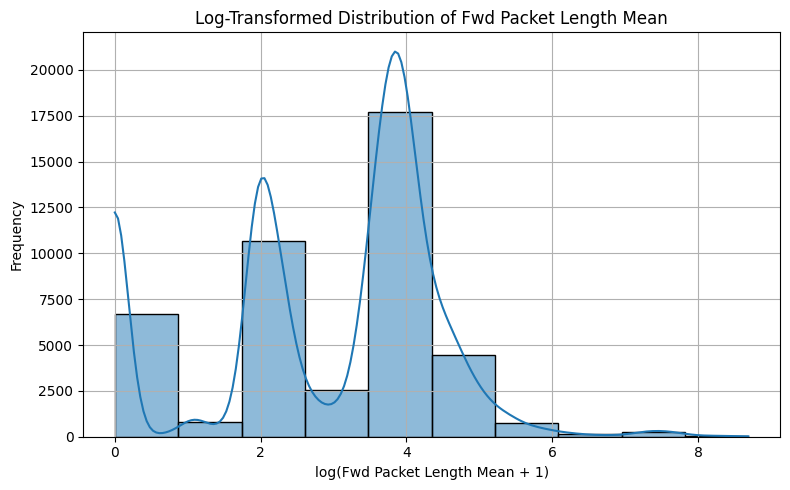

In [15]:
# Optional: Log-transformed version of the distribution of Fwd Packet Length Mean
plt.figure(figsize=(8, 5))

# Ensure the column is numeric
logs_df['Fwd Packet Length Mean'] = pd.to_numeric(logs_df['Fwd Packet Length Mean'], errors='coerce')

# Drop rows with NaN values in the column (if any)
logs_df = logs_df.dropna(subset=['Fwd Packet Length Mean'])

# Apply log transformation
sns.histplot(np.log1p(logs_df['Fwd Packet Length Mean']), bins=10, kde=True)
plt.title('Log-Transformed Distribution of Fwd Packet Length Mean')
plt.xlabel('log(Fwd Packet Length Mean + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


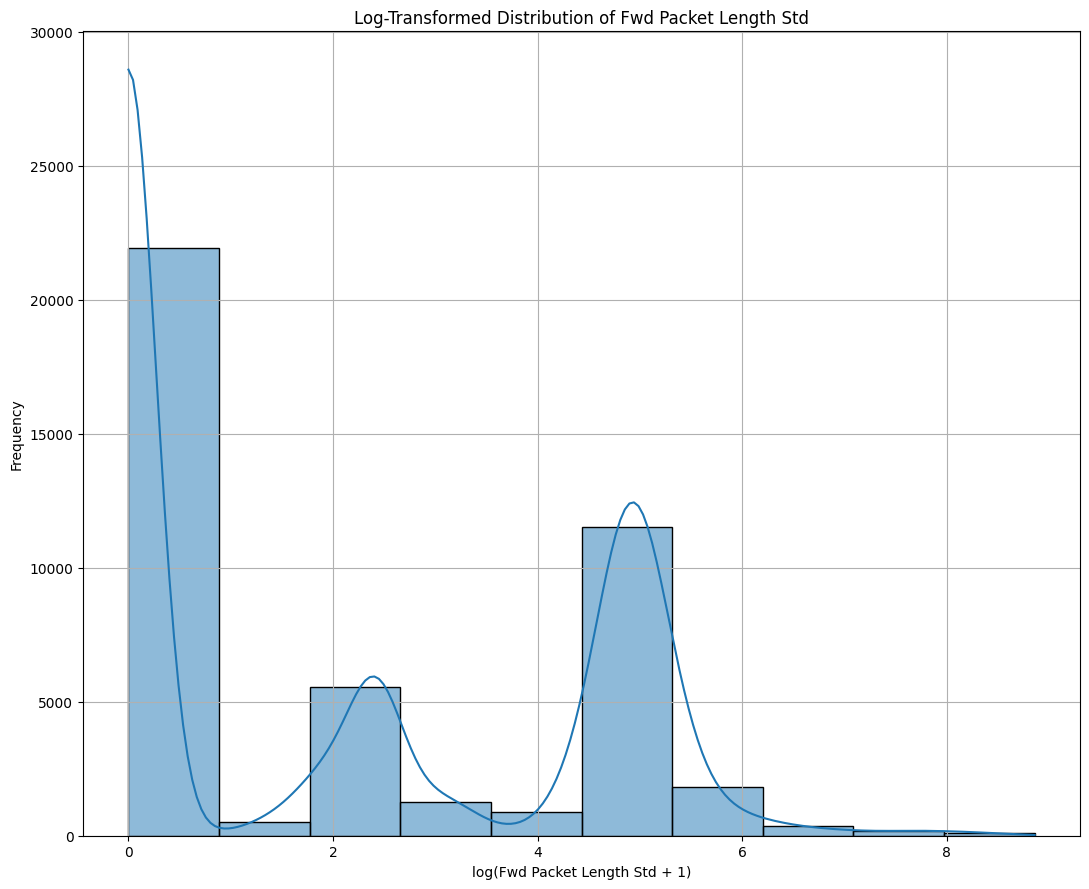

In [19]:
# Optional: Log-transformed version of the distribution of Fwd Packet Length Std
plt.figure(figsize=(11, 9))
# Ensure the column is numeric
logs_df['Fwd Packet Length Std'] = pd.to_numeric(logs_df['Fwd Packet Length Std'], errors='coerce')

# Drop rows with NaN values in the column (if any)
logs_df = logs_df.dropna(subset=['Fwd Packet Length Std'])

# Apply log transformation
sns.histplot(np.log1p(logs_df['Fwd Packet Length Std']), bins=10, kde=True)
plt.title('Log-Transformed Distribution of Fwd Packet Length Std')
plt.xlabel('log(Fwd Packet Length Std + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 3: Data Transformation

In [20]:
# Transform data (feature engineering)
#logs_df['Fwd Packet Length Min'] = np.min(logs_df['Total Length of Fwd Packets']) # take the min value of Total Length of Fwd Packets as Fwd Packet Length Min
#logs_df['Fwd Packet Length Max'] = np.max(logs_df['Total Length of Fwd Packets']) # take the max value of Total Length of Fwd Packets as Fwd Packet Length Max
#logs_df['Fwd Packet Length Mean'] = np.mean(logs_df['Total Length of Fwd Packets']) # take the mean value of Total Length of Fwd Packets as Fwd Packet Length Mean
#logs_df['Fwd Packet Length Std'] = np.std(logs_df['Total Length of Fwd Packets']) # take the std value of Total Length of Fwd Packets as Fwd Packet Length Std
# Ensure the column is numeric
#logs_df['Total Length of Bwd Packets'] = pd.to_numeric(logs_df['Total Length of Bwd Packets'], errors='coerce')

# Drop rows with NaN values in the column (if any)
#logs_df = logs_df.dropna(subset=['Total Length of Bwd Packets'])

# Apply log transformation
#logs_df['Bwd Packet Length Max'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Max
#logs_df['Bwd Packet Length Min'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Min
#logs_df['Bwd Packet Length Mean'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Mean
#logs_df['Bwd Packet Length Std'] = np.log1p(logs_df['Total Length of Bwd Packets'])  # log-transform the Total Length of Bwd Packets to create Bwd Packet Length Std
#logs_df['Fwd Packet Length Var'] = np.var(logs_df['Total Length of Fwd Packets']) # take the var value of Total Length of Fwd Packets as Fwd Packet Length Var
#logs_df['Bwd Packet Length Var'] = np.var(logs_df['Total Length of Bwd Packets']) # take the var value of Total Length of Bwd Packets as Bwd Packet Length Var
#logs_df['Fwd Packet Length Max'] = np.max(logs_df['Total Length of Fwd Packets']) # take the max value of Total Length of Fwd Packets as Fwd Packet Length Max
# Encode Labels
#logs_df = pd.get_dummies(logs_df, columns=['Label'], prefix='Lab')
#logs_df

## Step 4: Data Reduction

In [ ]:
# Cell 4: Reduce features (example: PCA on numeric fields)
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

# Ensure the required label columns exist
#if 'Label' in logs_df.columns:
    #logs_df['Label'] = le.fit_transform(logs_df['Label'])  # Encode 'Label' column if not already encoded
    # Create dummy variables for each label category
    #label_dummies = pd.get_dummies(logs_df['Label'], prefix='Lab')
    #logs_df = pd.concat([logs_df, label_dummies], axis=1)

# Update features list to include the correct dummy columns
#features = ['Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std',
            #'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std',
            #'Lab_3', 'Lab_6']  # Replace 'Lab_BruteForce' and 'Lab_DoS' with their corresponding dummy column names
#X = logs_df[features]

# Standardize
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Apply PCA
#pca = PCA(n_components=6)
#X_pca = pca.fit_transform(X_scaled)

# Add back to dataframe
#logs_df['pca_1'] = X_pca[:, 0]
#logs_df['pca_2'] = X_pca[:, 1]
#logs_df['pca_3'] = X_pca[:, 2]
#logs_df['pca_4'] = X_pca[:, 3]
#logs_df['pca_5'] = X_pca[:, 4]
#logs_df['pca_6'] = X_pca[:, 5]

#logs_df[['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6']] # Display PCA components


## Step 5: Data Enrichment

In [ ]:
# Enrich data by creating new features
#logs_df['Flow Duration (seconds)'] = logs_df['Flow Duration'] / 1e6  # Convert Flow Duration to seconds
#logs_df['Packet Length Ratio'] = logs_df['Total Length of Fwd Packets'] / (logs_df['Total Length of Bwd Packets'] + 1)  # Avoid division by zero
#logs_df['Total Packets'] = logs_df['Total Fwd Packets'] + logs_df['Total Backward Packets']  # Total number of packets
#logs_df['Fwd Packet Length Var'] = logs_df['Fwd Packet Length Std'] ** 2  # Variance of Fwd Packet Length
#logs_df['Bwd Packet Length Var'] = logs_df['Bwd Packet Length Std'] ** 2  # Variance of Bwd Packet Length

# Display enriched data
#logs_df

## Step 6: Data Validation

In [28]:
# Cell 6: Validate final data

# Ensure numerical_cols is defined
numerical_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets']  # Replace with the correct numerical columns in your dataset

# Fix negative values in numerical columns by replacing them with 0
logs_df[numerical_cols] = logs_df[numerical_cols].clip(lower=0)

# Perform validation checks
assert logs_df.isnull().sum().sum() == 0, "❌ Data contains missing values!"
assert (logs_df[numerical_cols] >= 0).all().all(), "❌ Numerical columns contain negative values!"
assert logs_df['Flow Duration'].min() > 0, "❌ Flow Duration contains non-positive values!"
assert logs_df['Total Fwd Packets'].min() > 0, "❌ Total Fwd Packets contains non-positive values!"
assert logs_df['Total Backward Packets'].min() >= 0, "❌ Total Backward Packets contains negative values!"

print("✅ Data validation passed.")

✅ Data validation passed.


# The main Exercise  Using the same Dataset CICIDS2017_sample.csv

## Step 2: Data Preprocessing

In [96]:
r=logs_df.isna().sum()
print(r[r>0])

Flow Bytes/s    54
dtype: int64


In [99]:
logs_df.dropna(inplace=True)

In [98]:
logs_df.replace(np.inf, np.nan, inplace=True)

In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scale=StandardScaler()
le = LabelEncoder()
logs_df['Label'] = le.fit_transform(logs_df['Label'])

In [103]:
for i in logs_df['Label'].index:
    if logs_df['Label'][i] != 0:
        logs_df['Label'][i] = 1
    else:
        logs_df['Label'][i] =0

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  logs_df['Label'][i] =0
<ipython-input-103-eb1e51e9efd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs_df['Label'][i] =0
<ipython-input-103-eb1e51e9efd9>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a 

In [104]:
logs_df['Label']

0        0
1        0
2        0
3        0
4        0
        ..
56656    0
56657    0
56658    1
56659    1
56660    1
Name: Label, Length: 56580, dtype: int64

## Step 3: Splitting the Dataset

In [105]:

# Splitting into training, validation, and test sets

from sklearn.model_selection import train_test_split

X = logs_df.drop(columns=['Label'])  # Features
y = logs_df[['Label']]  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.8, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (16974, 77), Validation set: (7921, 77), Test set: (31685, 77)


In [106]:
y_train.value_counts()

Label
1        10158
0         6816
Name: count, dtype: int64

## Step 4: Training and Evaluating Decision Trees


Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None} with Validation Accuracy: 0.9944

Test Accuracy: 0.9925832412813634
Classification Report (Test):
               precision    recall  f1-score   support

      Attack       0.99      0.99      0.99     12722
      Benign       0.99      1.00      0.99     18963

    accuracy                           0.99     31685
   macro avg       0.99      0.99      0.99     31685
weighted avg       0.99      0.99      0.99     31685



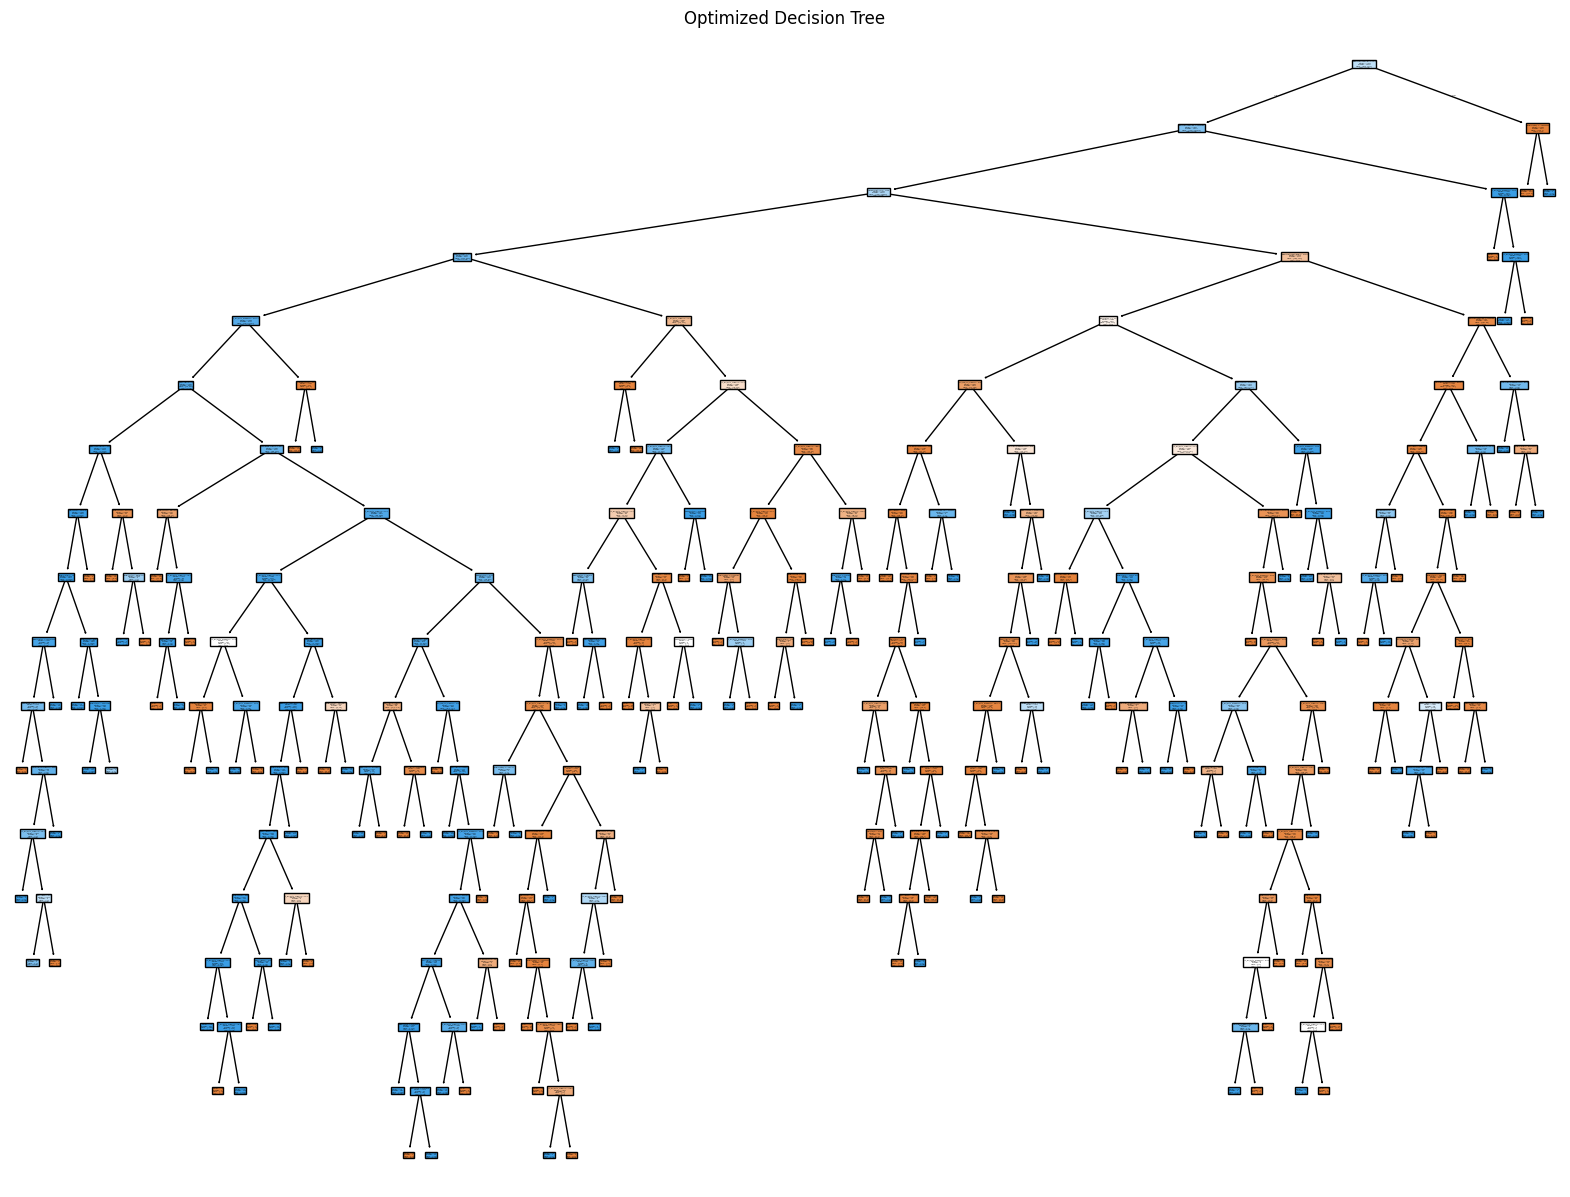

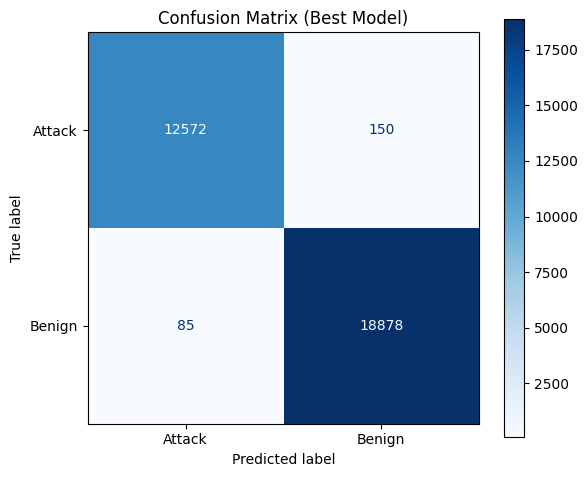

In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Hyperparameter options
criteria = ['gini', 'entropy']
max_depths = [3, 5, 10, None]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]
max_features_options = [None, 'sqrt', 'log2']

best_score = 0
best_params = {}

# Grid search for best parameters
for cr in criteria:
    for depth in max_depths:
        for split in min_samples_splits:
            for leaf in min_samples_leafs:
                for feature in max_features_options:
                    clf = DecisionTreeClassifier(
                        criterion=cr,
                        max_depth=depth,
                        min_samples_split=split,
                        min_samples_leaf=leaf,
                        max_features=feature,
                        random_state=42
                    )
                    clf.fit(X_train, y_train)
                    val_preds = clf.predict(X_val)
                    val_score = accuracy_score(y_val, val_preds)

                    if val_score > best_score:
                        best_score = val_score
                        best_params = {
                            'criterion': cr,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': feature
                        }

# Train final model with best parameters
print(f"\nBest Decision Tree Params: {best_params} with Validation Accuracy: {best_score:.4f}\n")

final_clf = DecisionTreeClassifier(**best_params, random_state=42)
final_clf.fit(X_train, y_train)
test_preds = final_clf.predict(X_test)

# Evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("Classification Report (Test):\n", classification_report(y_test, test_preds, target_names=['Attack', 'Benign']))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Attack', 'Benign'])

# Plot decision tree
plt.figure(figsize=(20, 15))
plot_tree(
    final_clf,
    feature_names=X.columns,
    class_names=['Attack', 'Benign'],
    filled=True
)
plt.title("Optimized Decision Tree")
plt.show()

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.title("Confusion Matrix (Best Model)")
plt.tight_layout()
plt.show()


# 2. Others test


Decision Tree with criterion='gini' and max_depth=3
Validation Accuracy: 0.8353743214240626
Test Accuracy: 0.832223449581821
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.62      0.75     12722
           1       0.79      0.97      0.87     18963

    accuracy                           0.83     31685
   macro avg       0.87      0.80      0.81     31685
weighted avg       0.85      0.83      0.82     31685



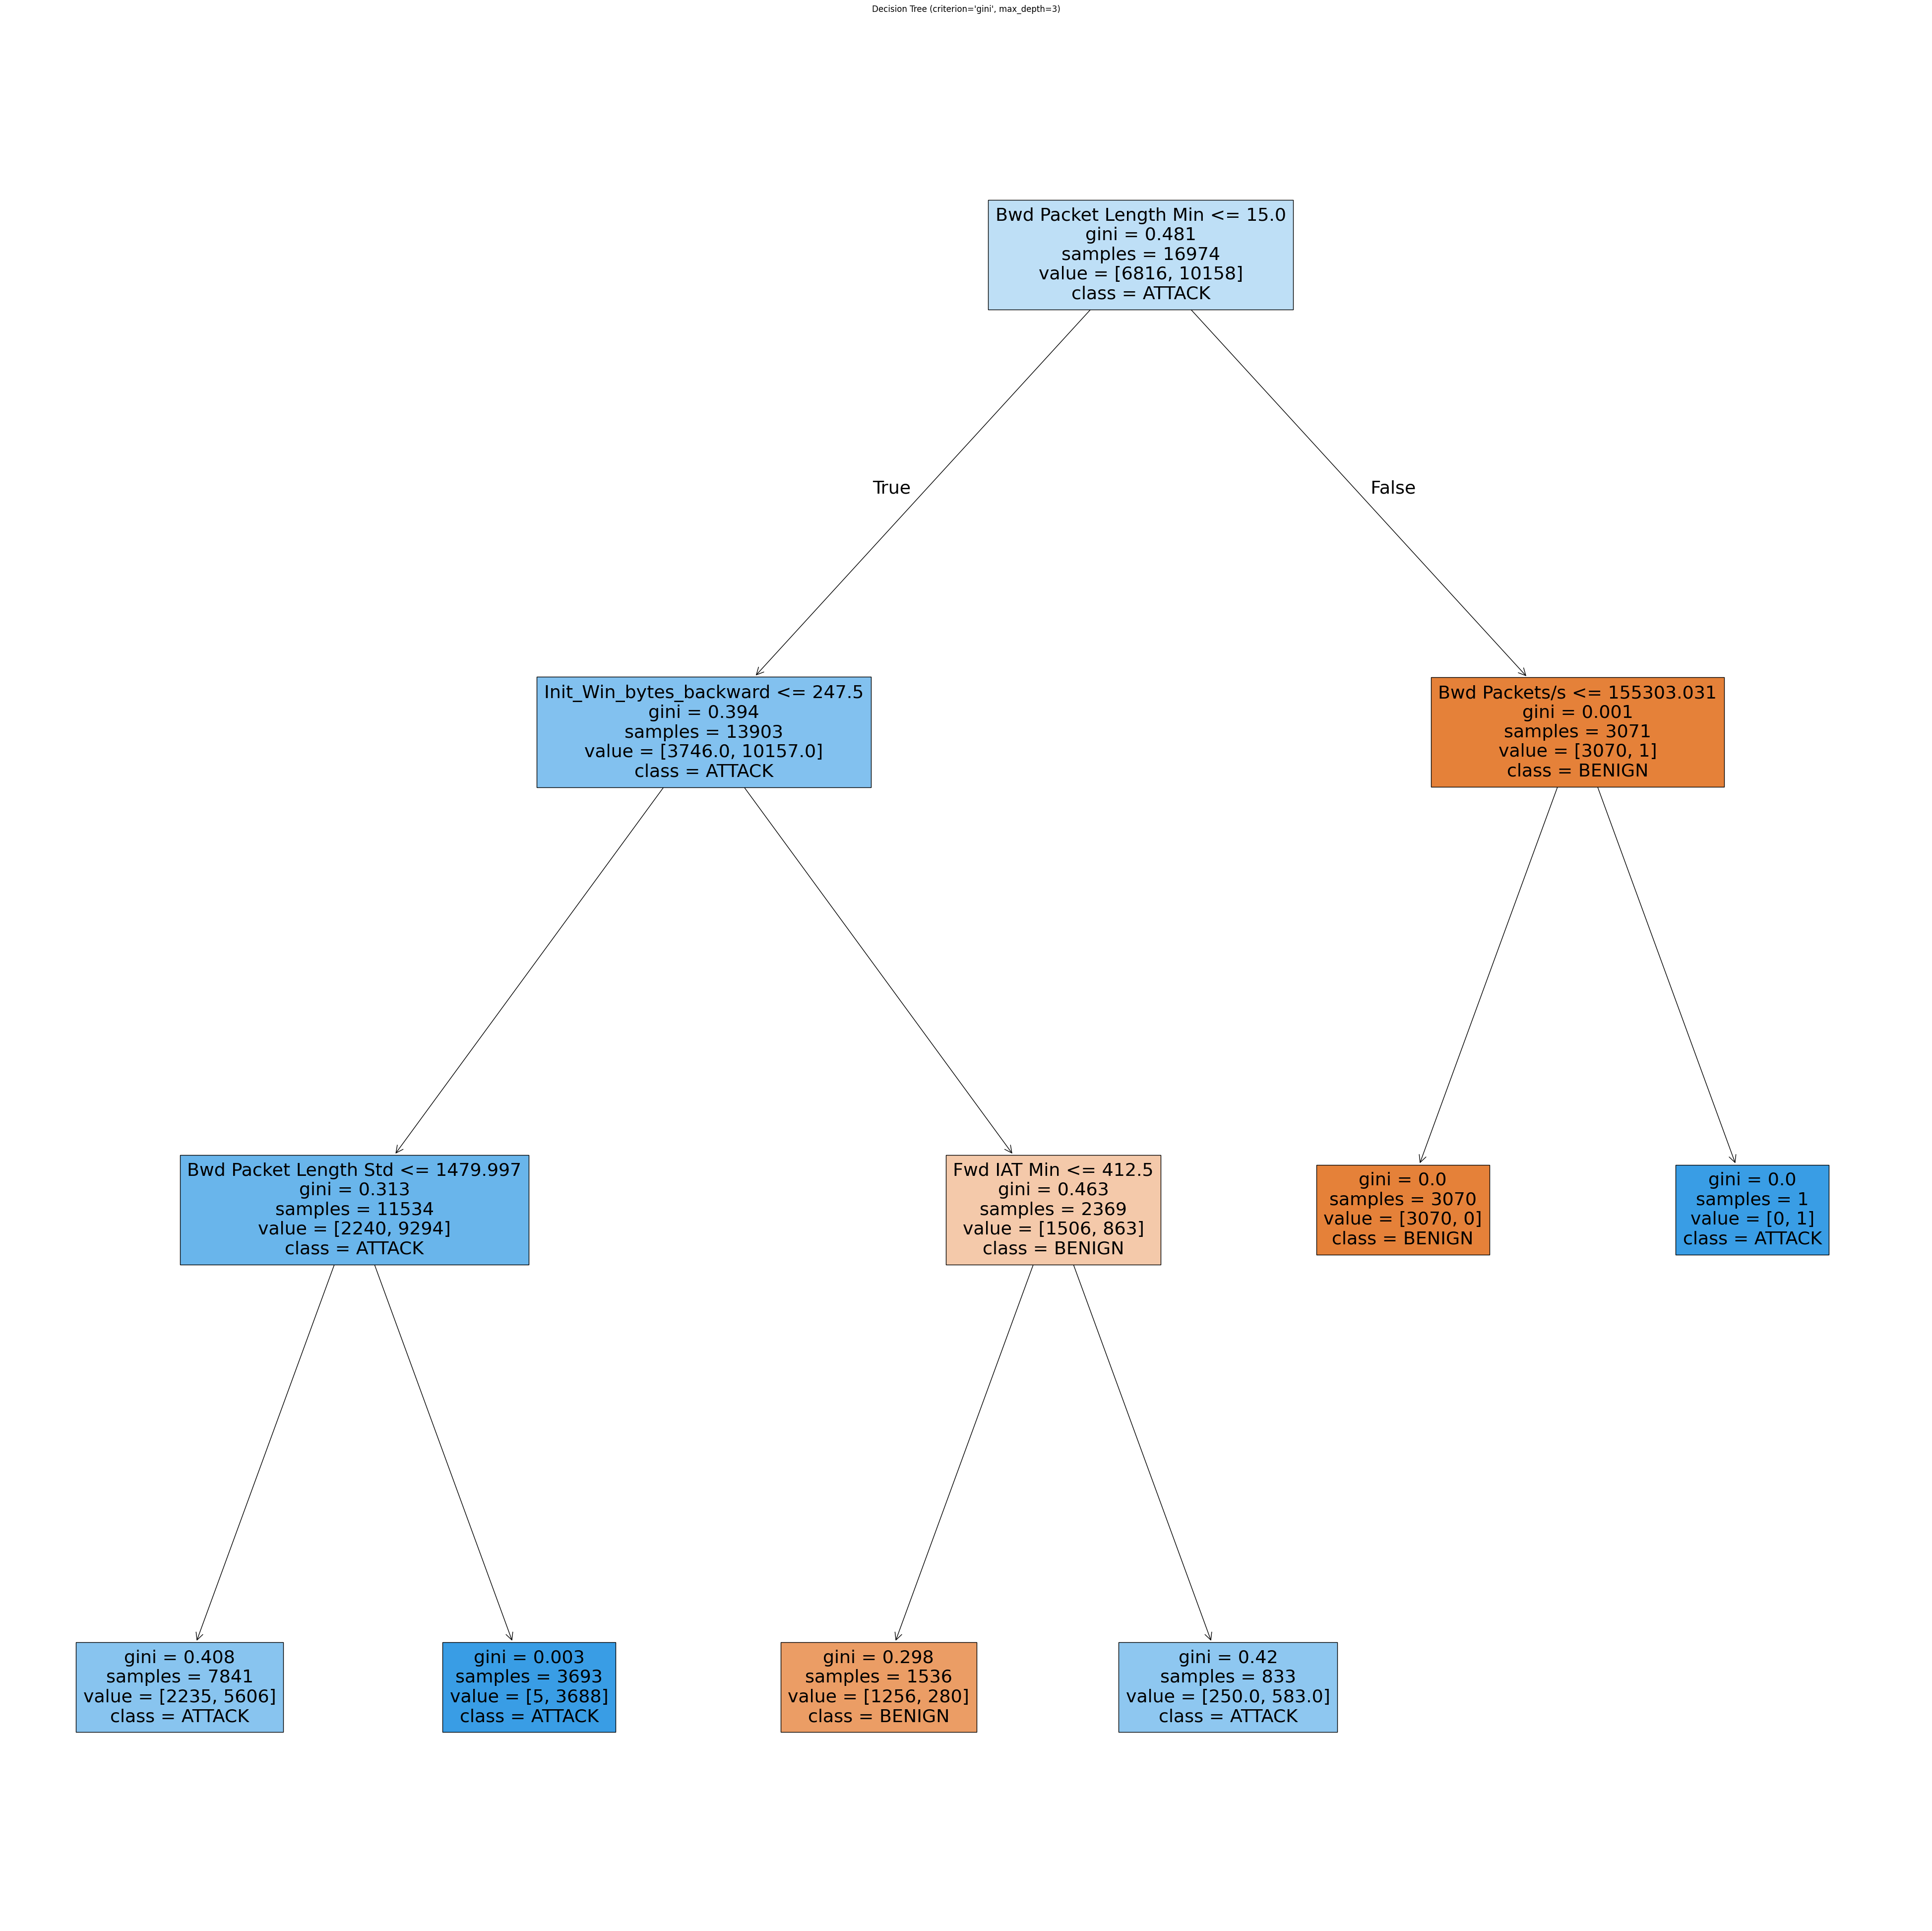

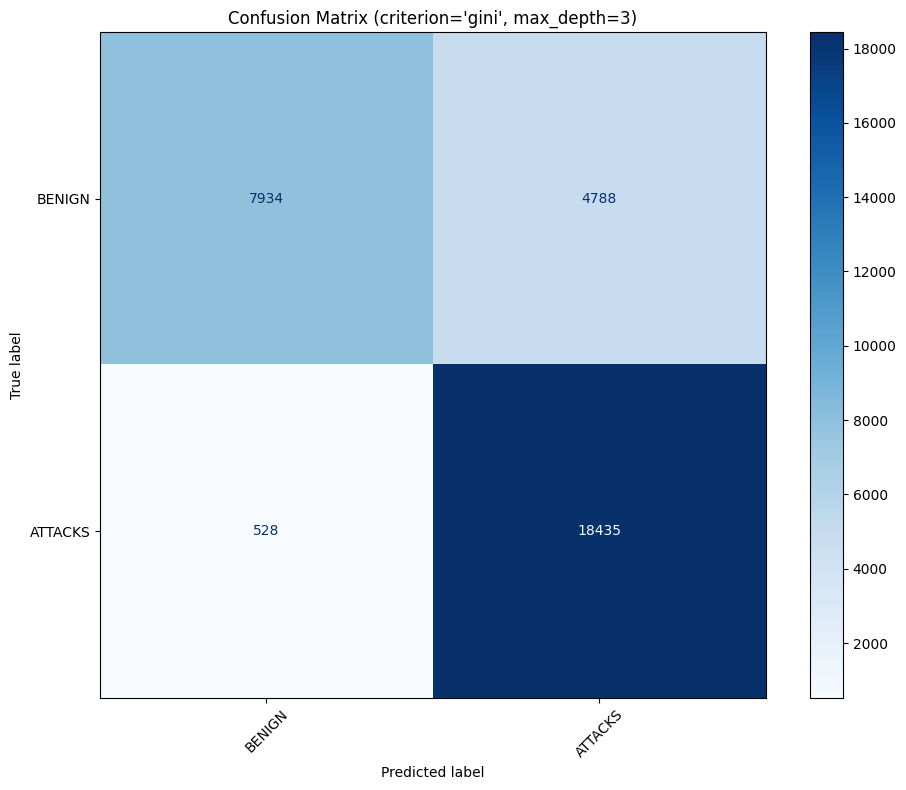


Decision Tree with criterion='gini' and max_depth=5
Validation Accuracy: 0.9269031687918192
Test Accuracy: 0.9194571563831466
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     12722
           1       0.91      0.96      0.93     18963

    accuracy                           0.92     31685
   macro avg       0.92      0.91      0.91     31685
weighted avg       0.92      0.92      0.92     31685



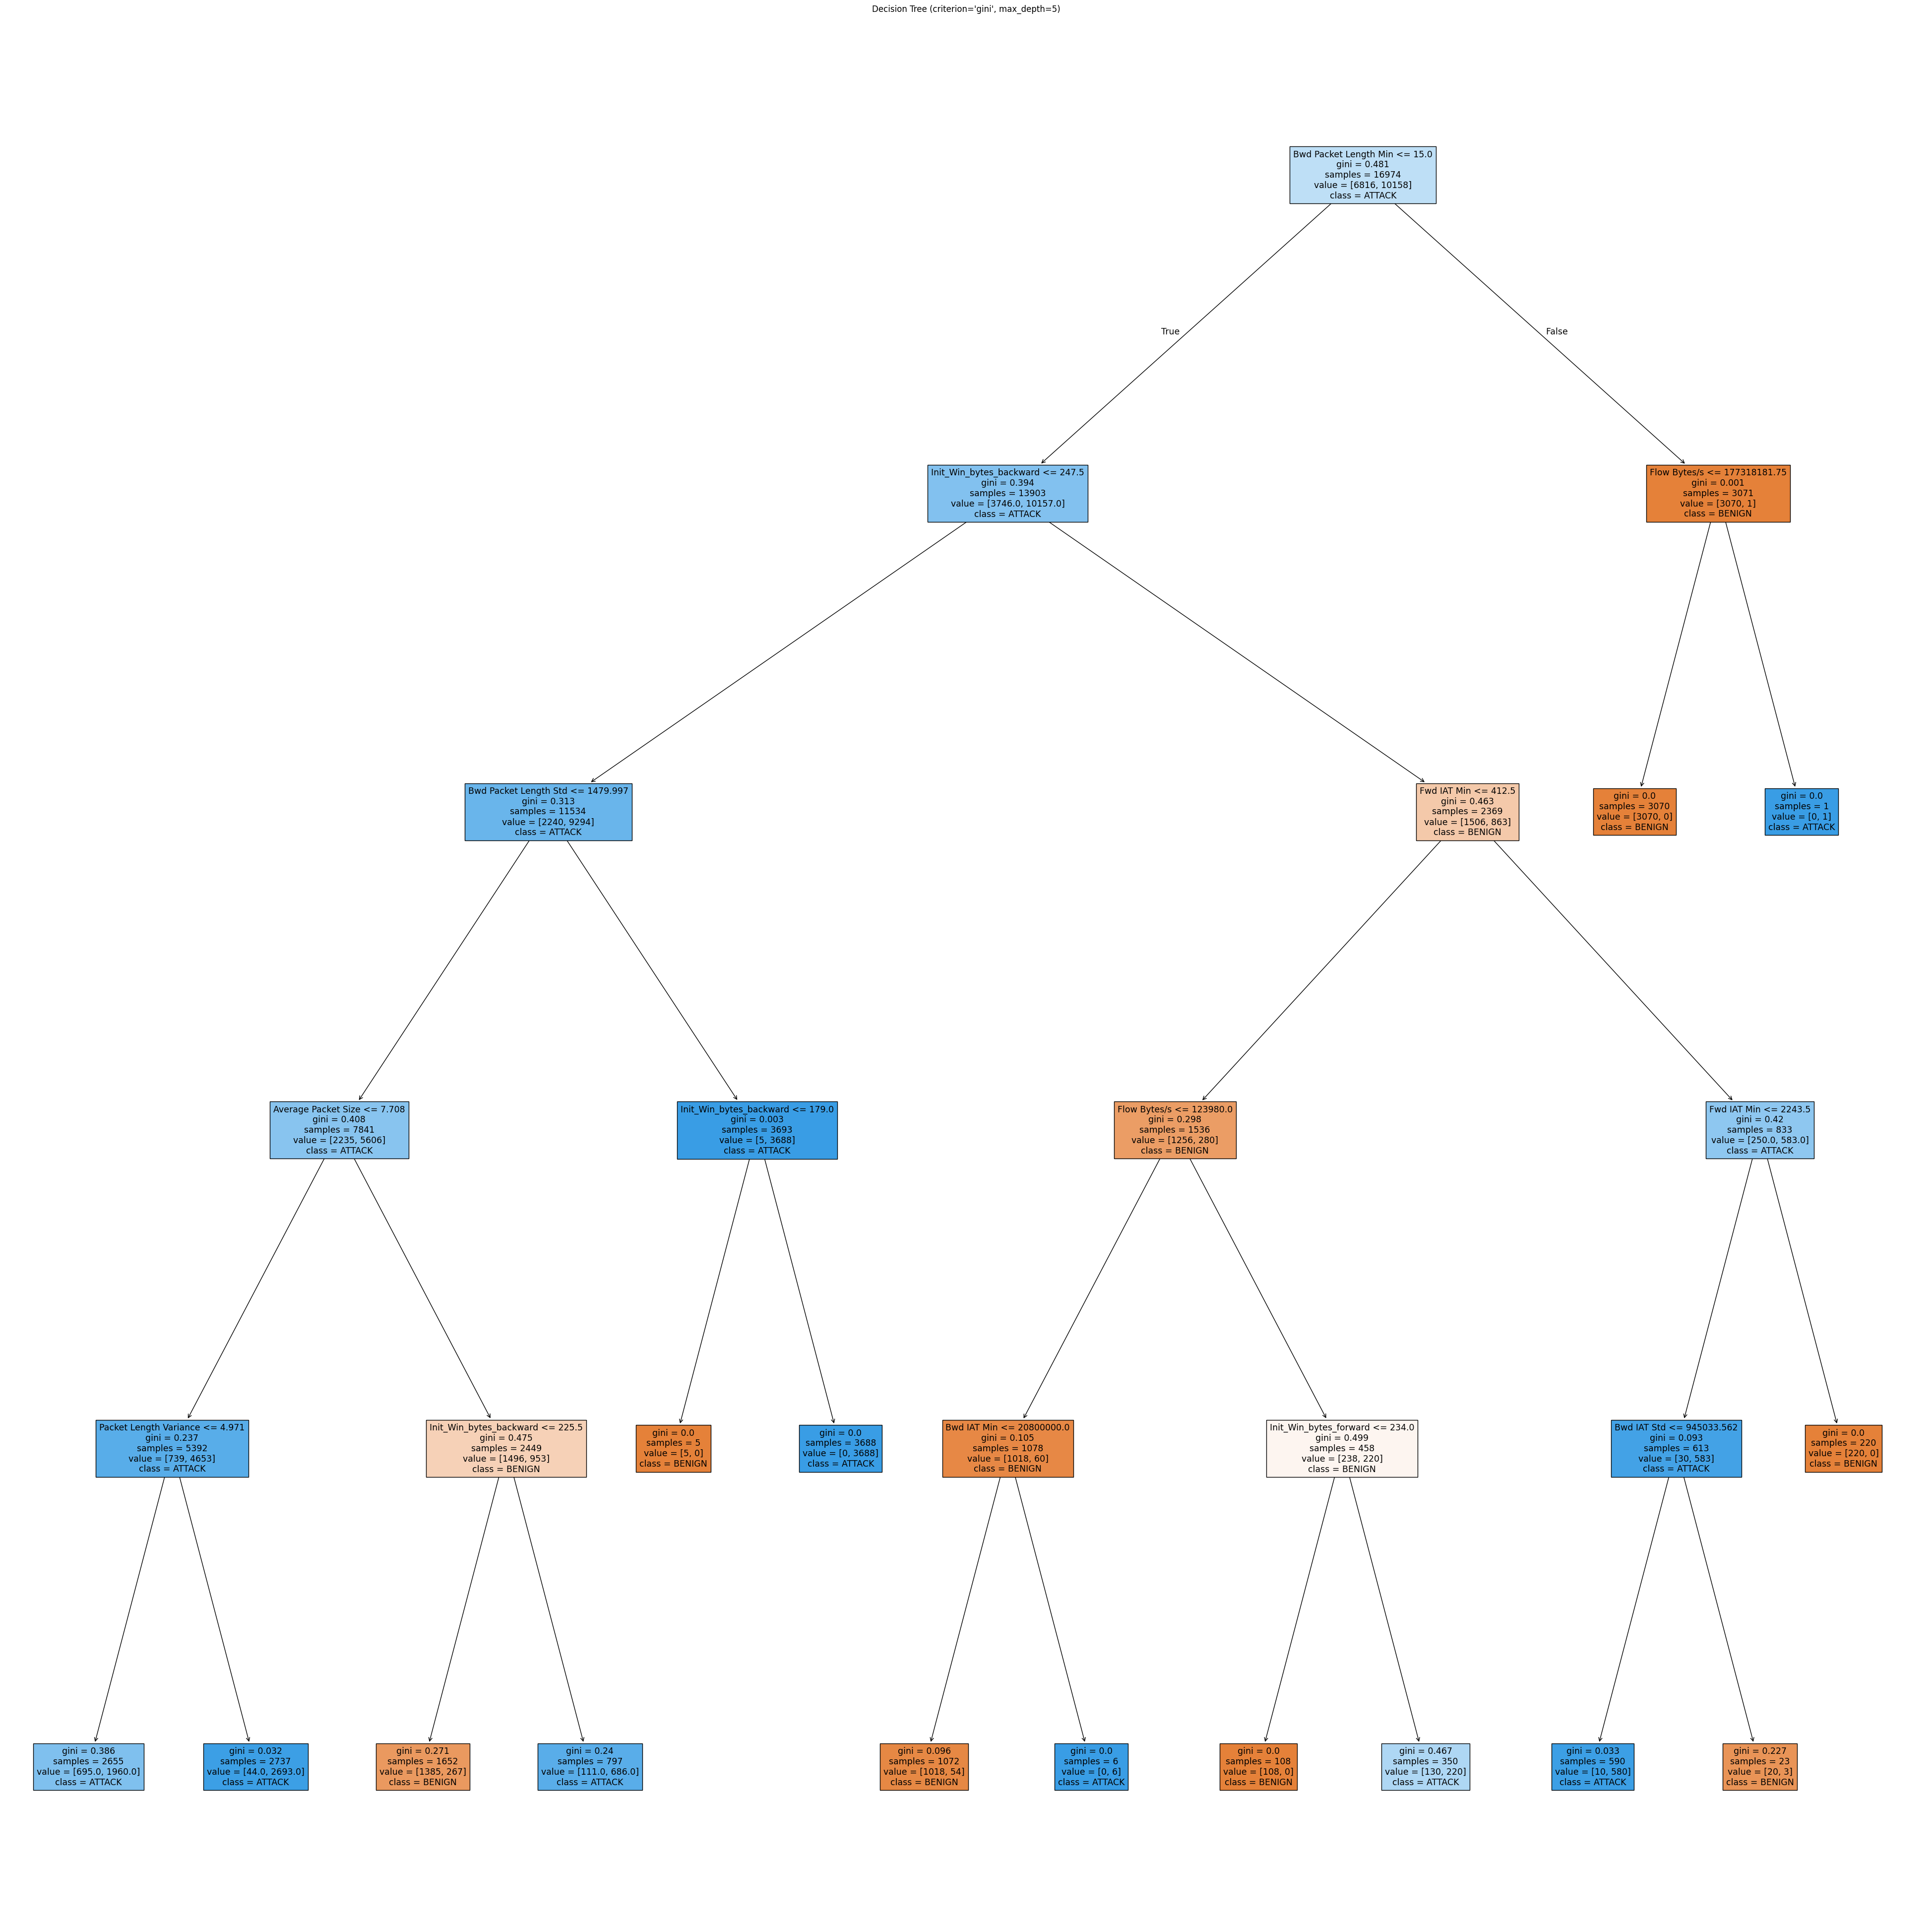

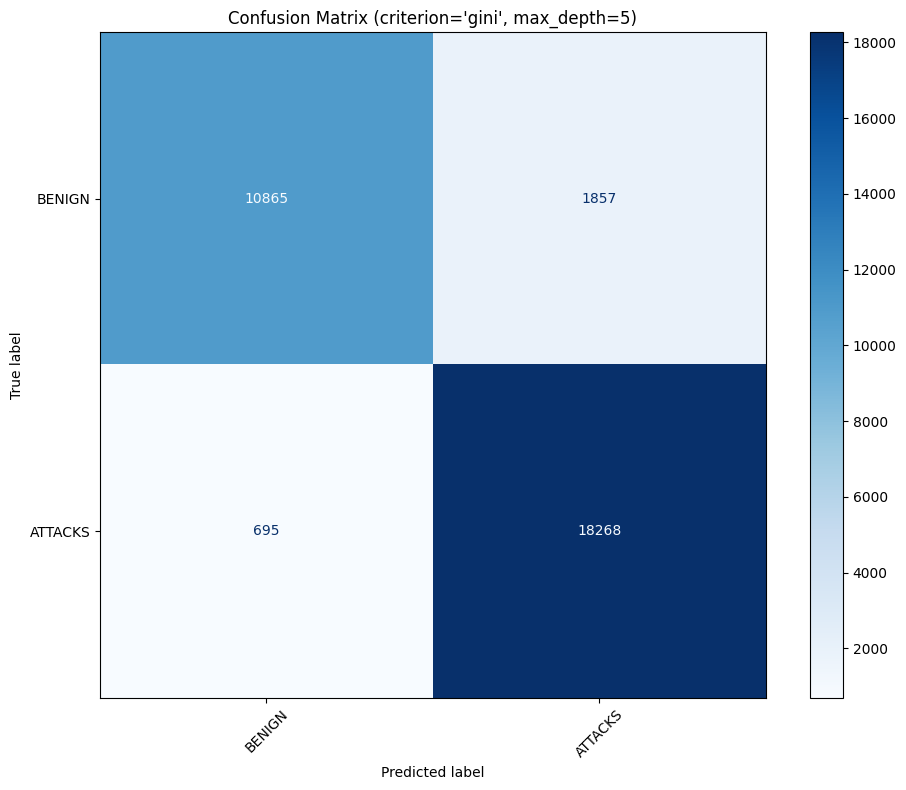


Decision Tree with criterion='entropy' and max_depth=3
Validation Accuracy: 0.851912637293271
Test Accuracy: 0.8479722266056494
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     12722
           1       0.87      0.87      0.87     18963

    accuracy                           0.85     31685
   macro avg       0.84      0.84      0.84     31685
weighted avg       0.85      0.85      0.85     31685



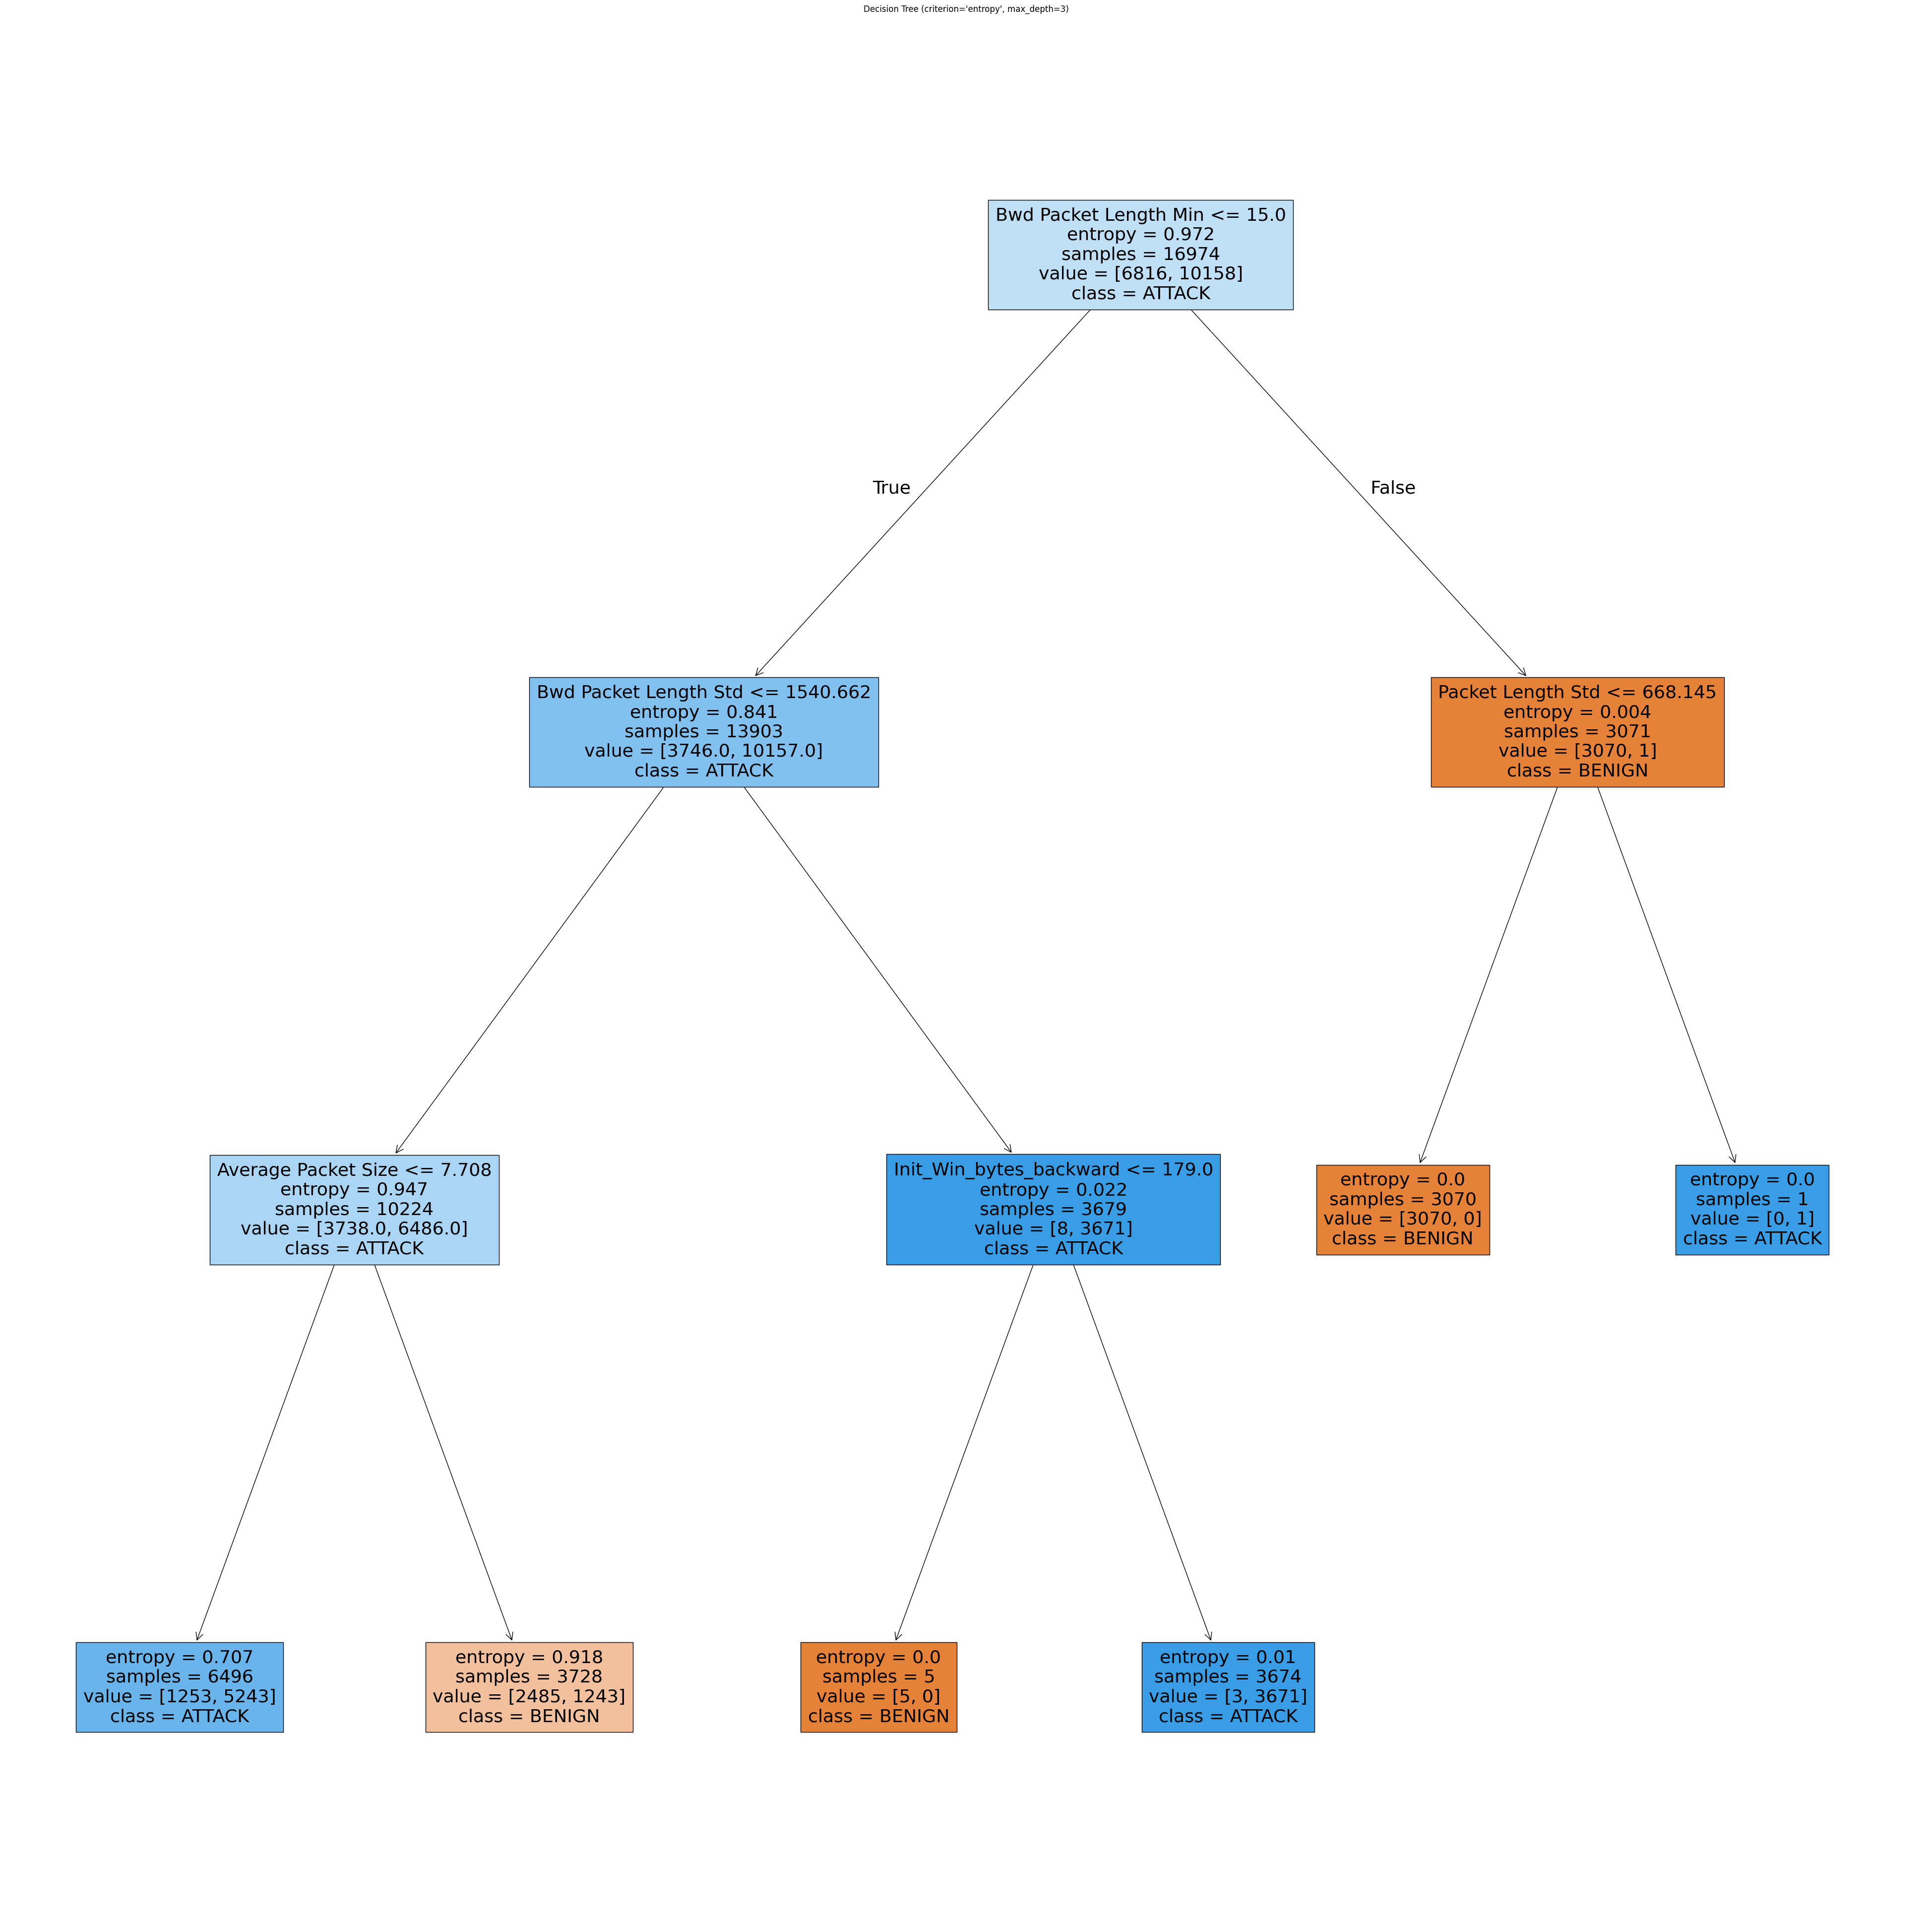

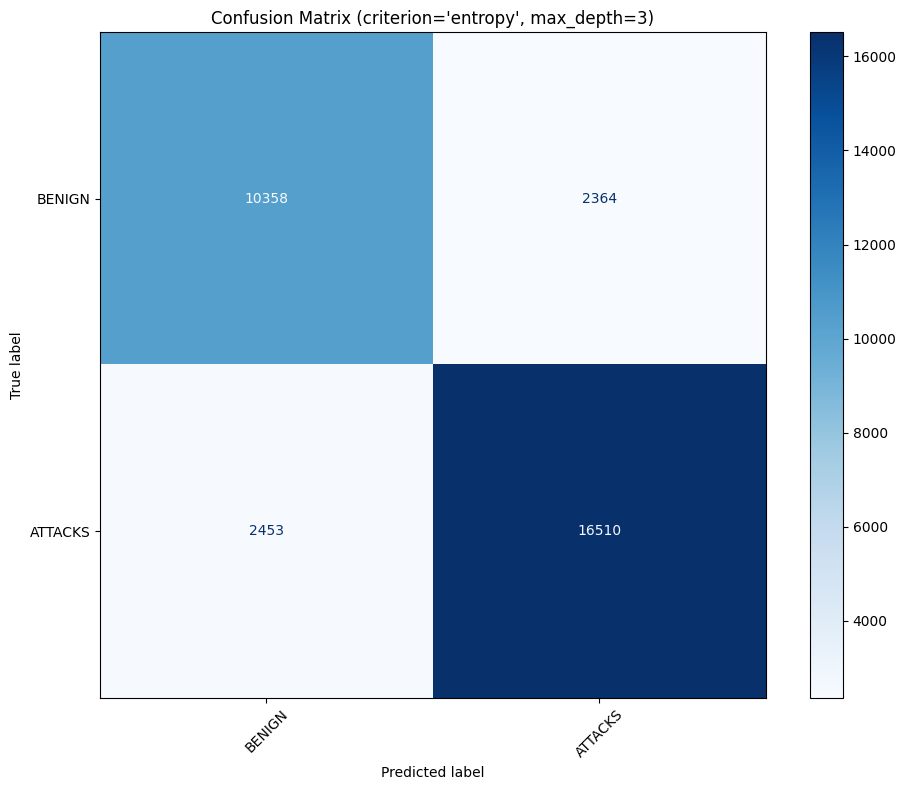


Decision Tree with criterion='entropy' and max_depth=5
Validation Accuracy: 0.9085973993182679
Test Accuracy: 0.9052548524538425
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     12722
           1       0.90      0.95      0.92     18963

    accuracy                           0.91     31685
   macro avg       0.91      0.89      0.90     31685
weighted avg       0.91      0.91      0.90     31685



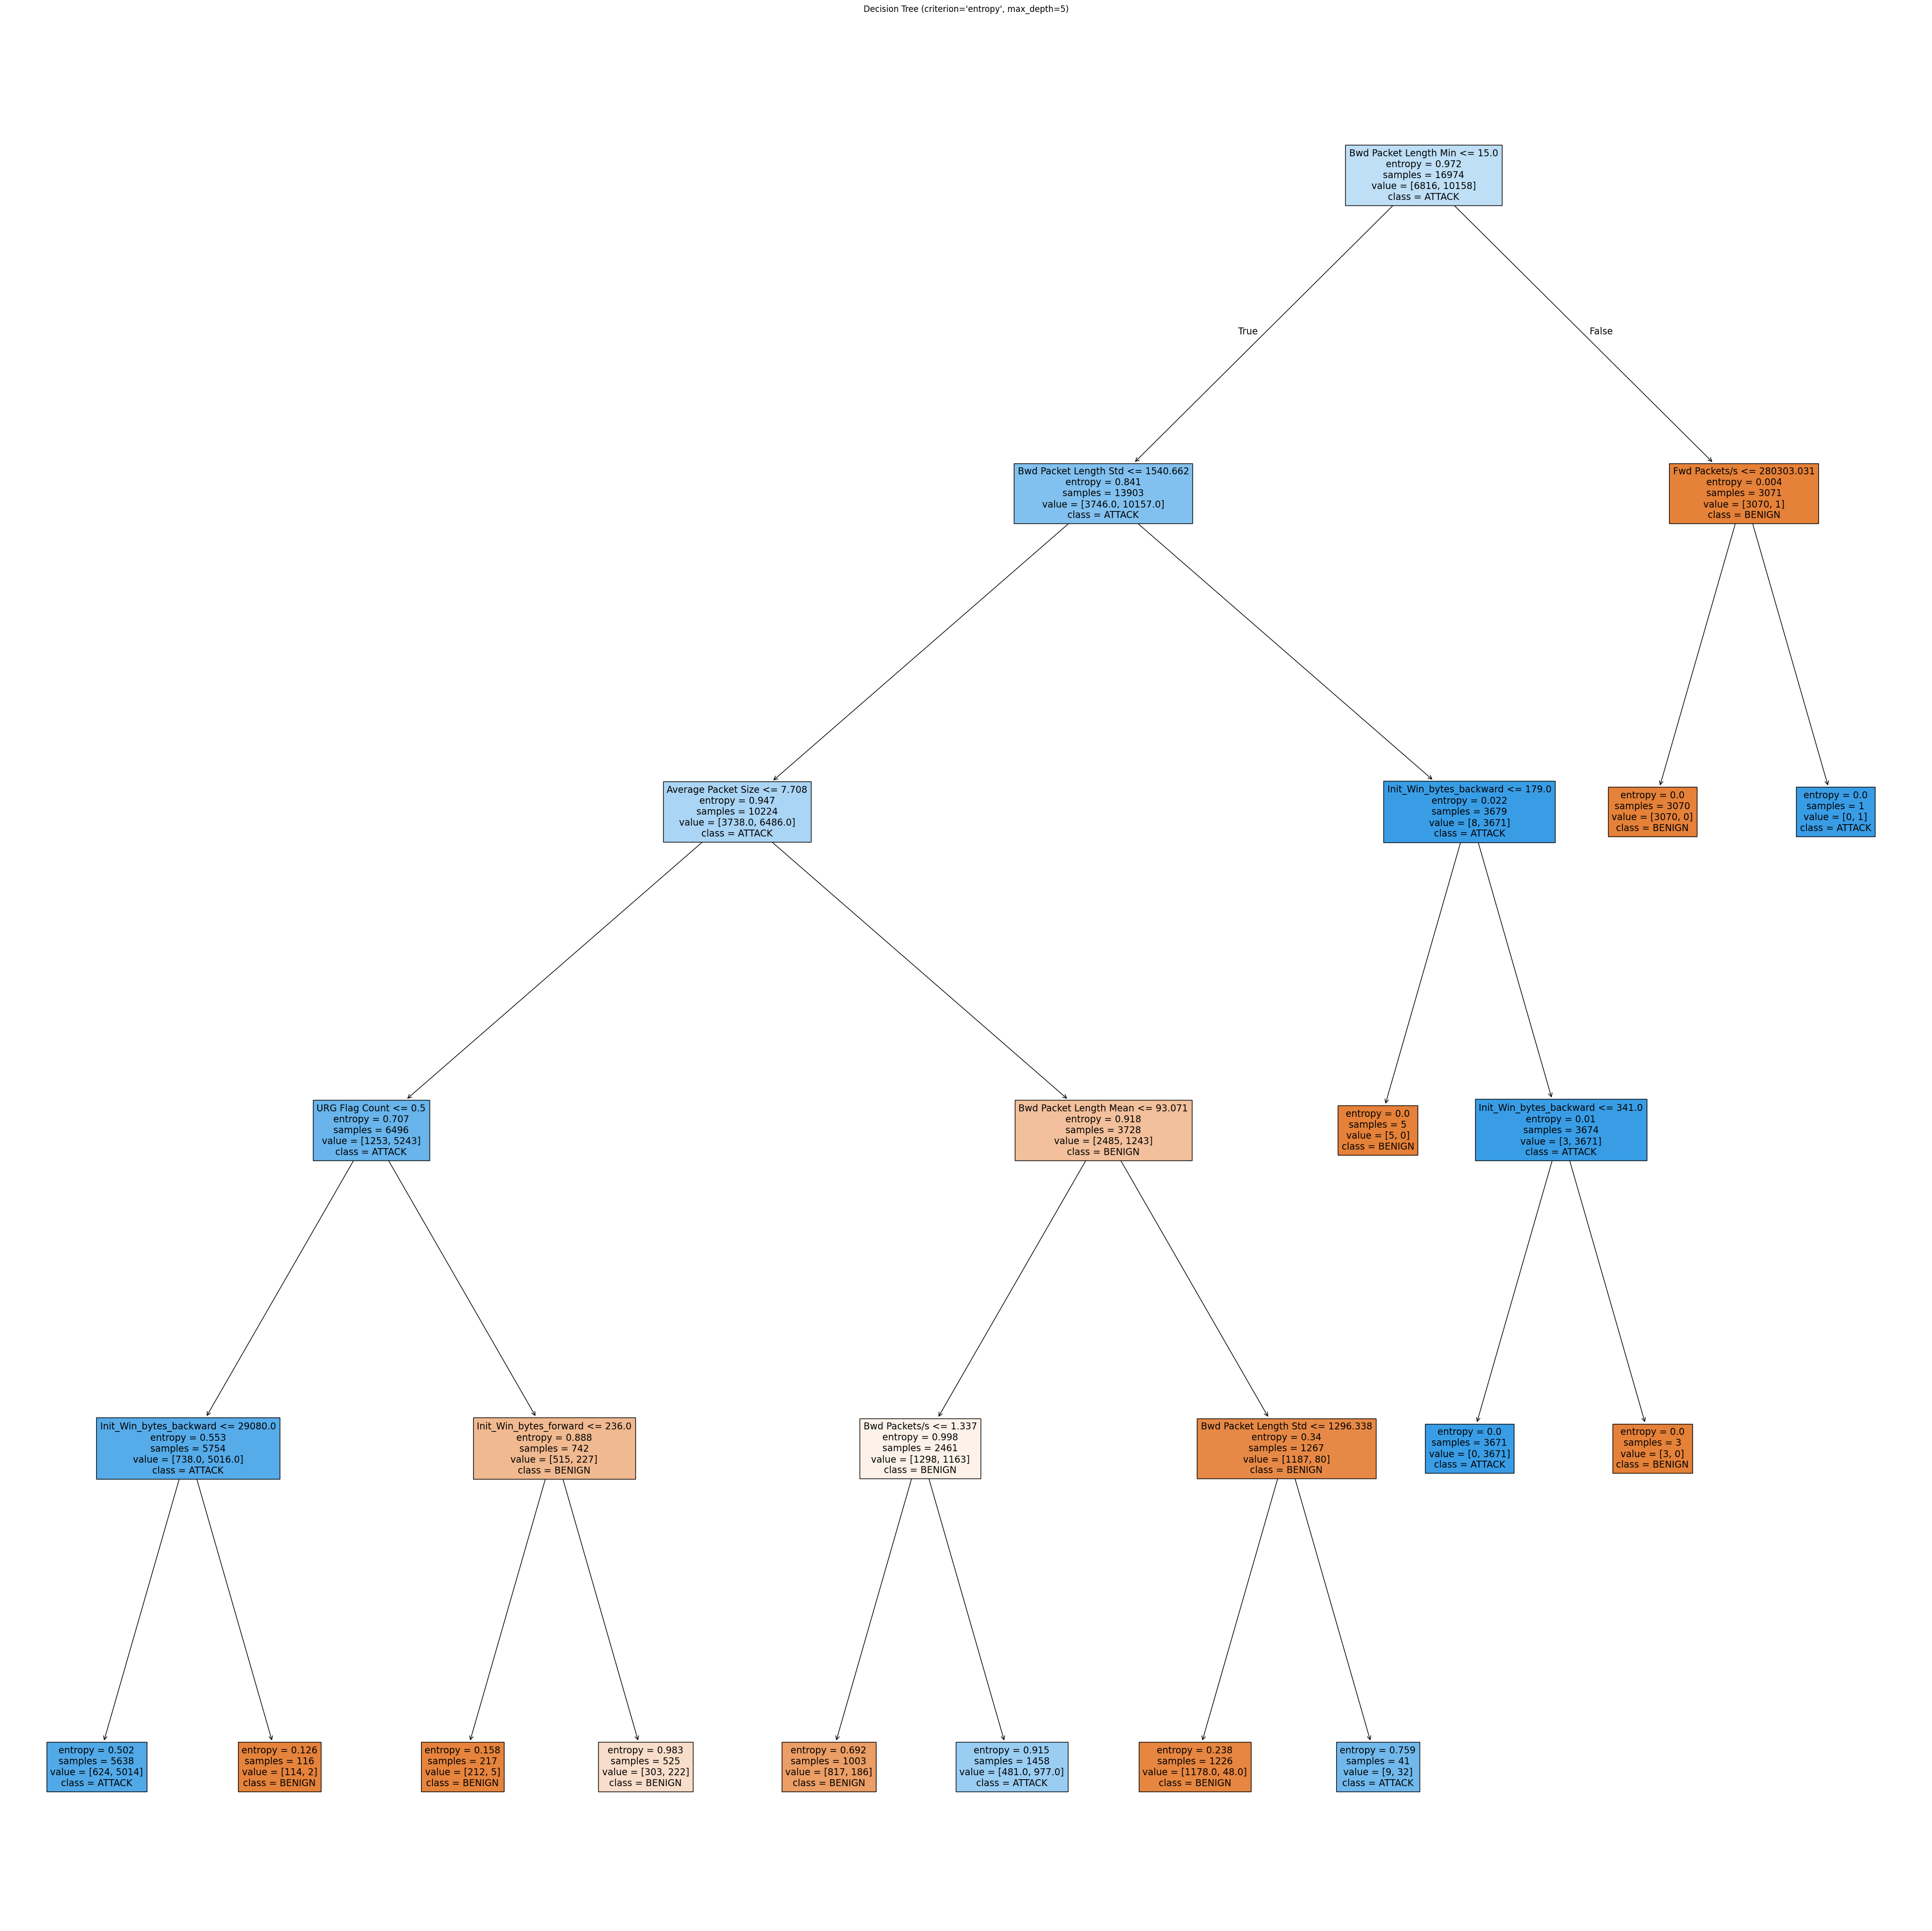

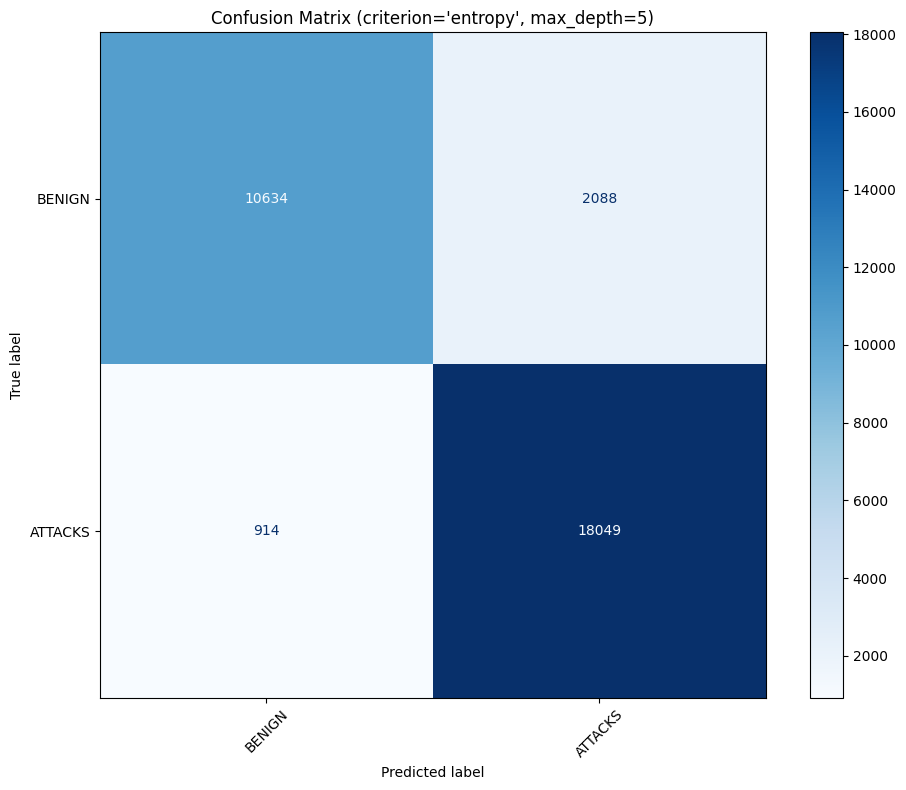

In [112]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

criteria = ['gini', 'entropy']
max_depths = [3, 5]

for criterion in criteria:
    for depth in max_depths:
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)

        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, test_preds)
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=['BENIGN', 'ATTACKS']
        )

        print(f"\nDecision Tree with criterion='{criterion}' and max_depth={depth}")
        print("Validation Accuracy:", accuracy_score(y_val, val_preds))
        print("Test Accuracy:", accuracy_score(y_test, test_preds))
        print("Classification Report (Test):\n", classification_report(y_test, test_preds))

        # Plot decision tree
        plt.figure(figsize=(50, 50))
        plot_tree(
            clf,
            feature_names=X.columns,
            class_names=['BENIGN', 'ATTACK'],
            filled=True
        )
        plt.title(f"Decision Tree (criterion='{criterion}', max_depth={depth})")
        plt.show()

        # Plot confusion matrix with rotated x-axis labels
        fig, ax = plt.subplots(figsize=(10, 8))
        disp.plot(cmap='Blues', values_format='d', ax=ax)
        plt.xticks(rotation=45)
        plt.title(f"Confusion Matrix (criterion='{criterion}', max_depth={depth})")
        plt.tight_layout()
        plt.show()


## Step 5: Visualizing Tree Splitting Logic

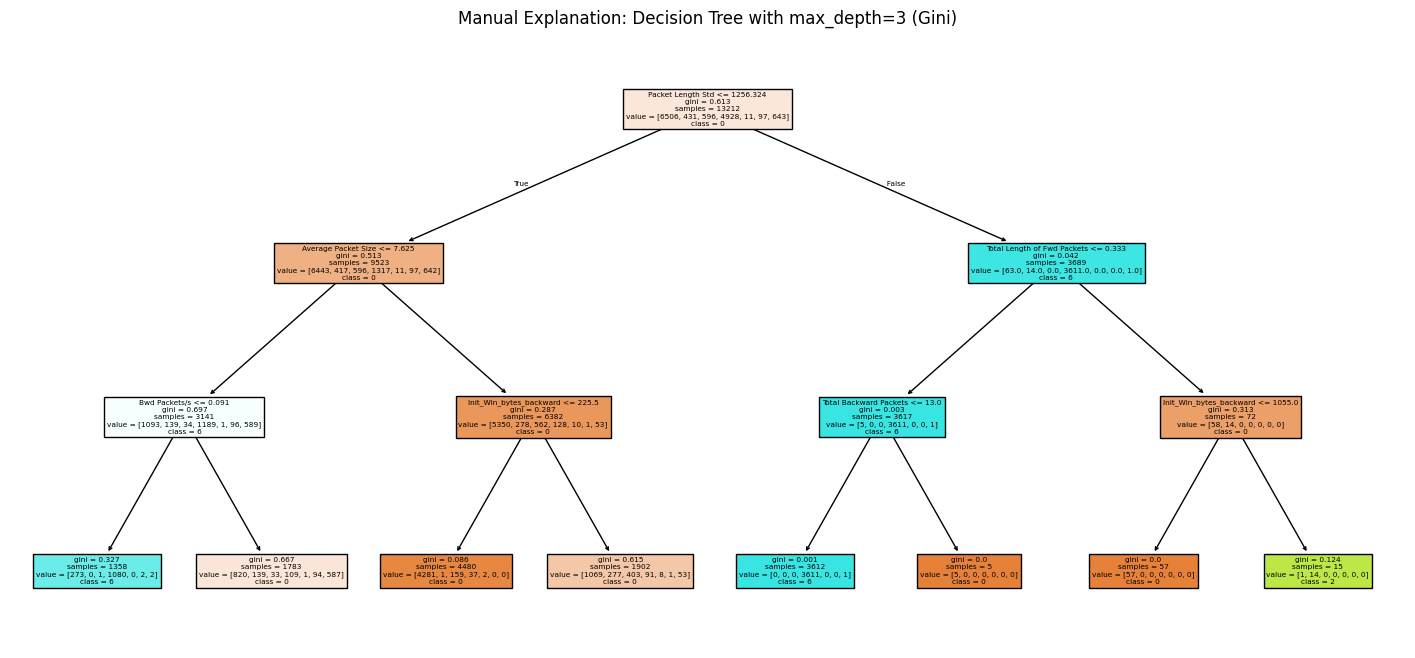

Each node shows:
- Gini: Impurity
- Samples: Count at the node
- Value: [# of BENIGN, # of Dos, # of PortScan, # of Bot, # of Infiltration, # of WebAttack, # of BruteForce]
- Class: Predicted class at that node


In [36]:

# Explain the build of one decision tree

clf_simple = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_simple.fit(X_train, y_train)

plt.figure(figsize=(18, 8))
# Ensure feature_names matches the number of features in X_train
plot_tree(clf_simple, feature_names=X_train.columns.tolist(), class_names=[str(cls) for cls in y_train['Label'].unique()], filled=True)
plt.title("Manual Explanation: Decision Tree with max_depth=3 (Gini)")
plt.show()

print("""Each node shows:
- Gini: Impurity
- Samples: Count at the node
- Value: [# of BENIGN, # of Dos, # of PortScan, # of Bot, # of Infiltration, # of WebAttack, # of BruteForce]
- Class: Predicted class at that node""")


## 3. Test with the hyperparameter with entropy


Decision Tree with best parameters
Validation Accuracy: 0.9696723970158936
Test Accuracy: 0.9708088384350294
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     12145
           1       0.90      0.91      0.91       805
           2       0.99      0.95      0.97      1113
           3       0.98      0.98      0.98      9201
           4       0.71      0.25      0.37        20
           5       0.84      0.86      0.85       181
           6       0.95      0.94      0.94      1200

    accuracy                           0.97     24665
   macro avg       0.91      0.84      0.86     24665
weighted avg       0.97      0.97      0.97     24665



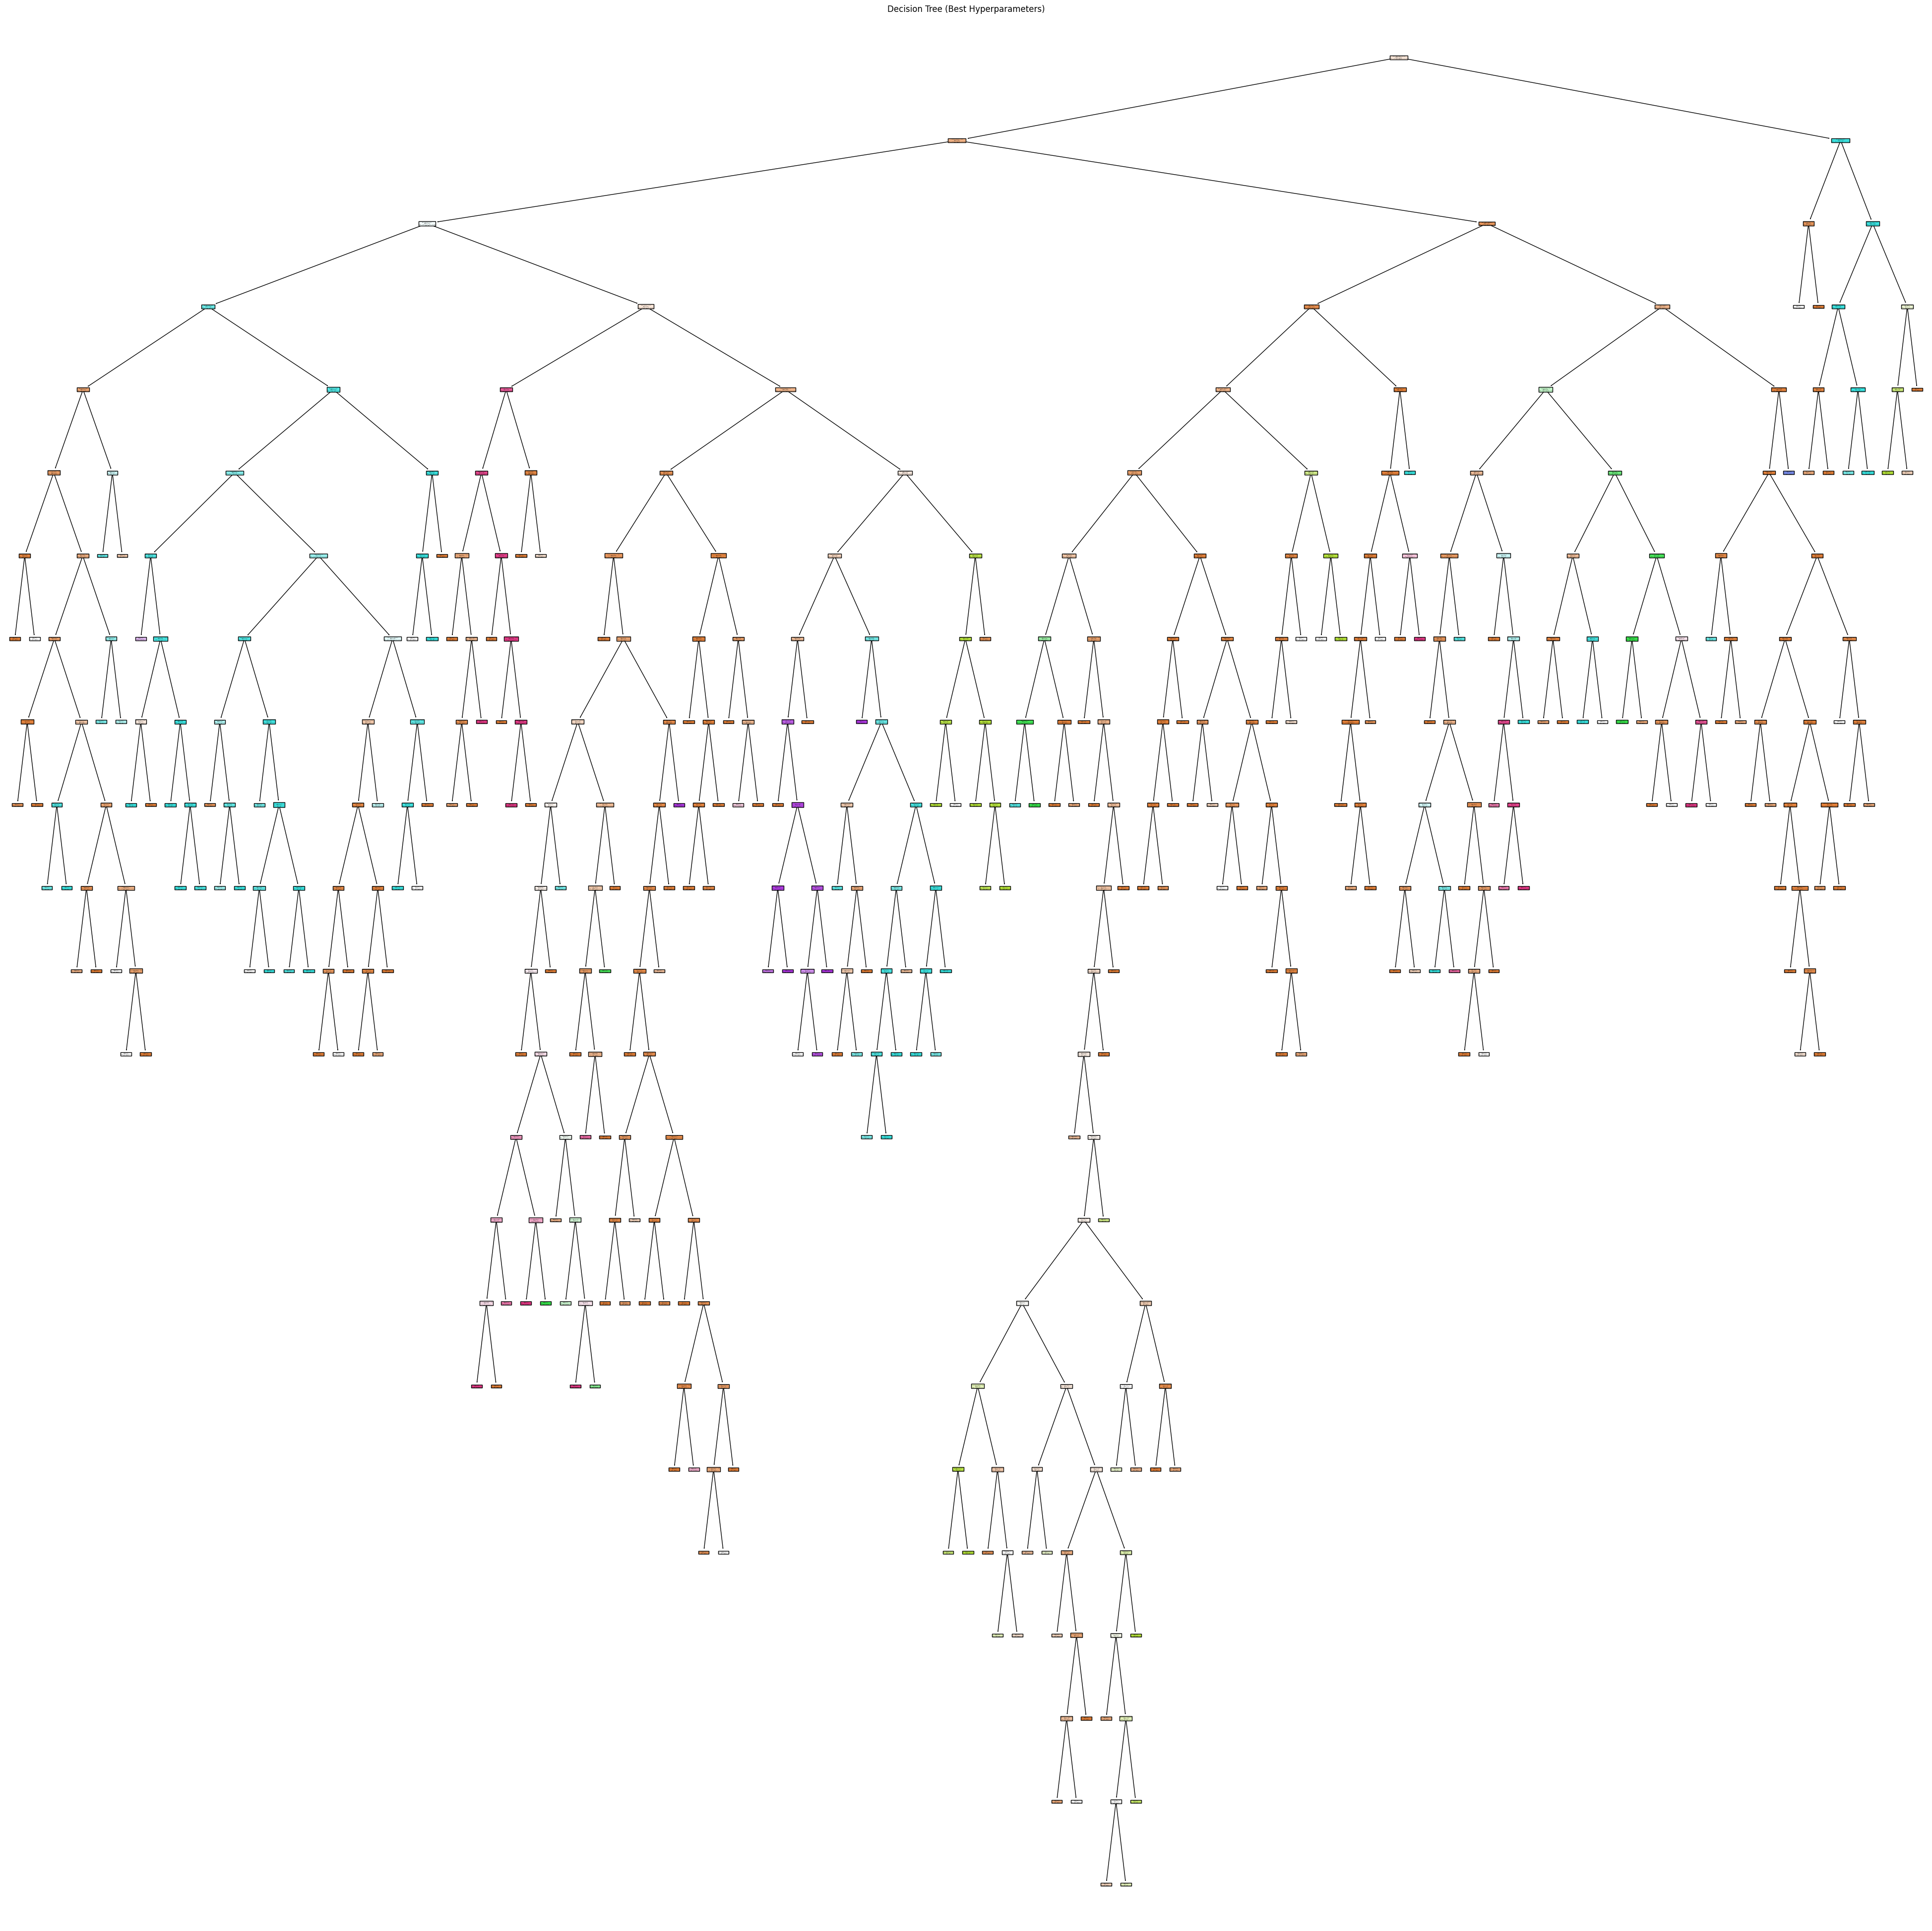

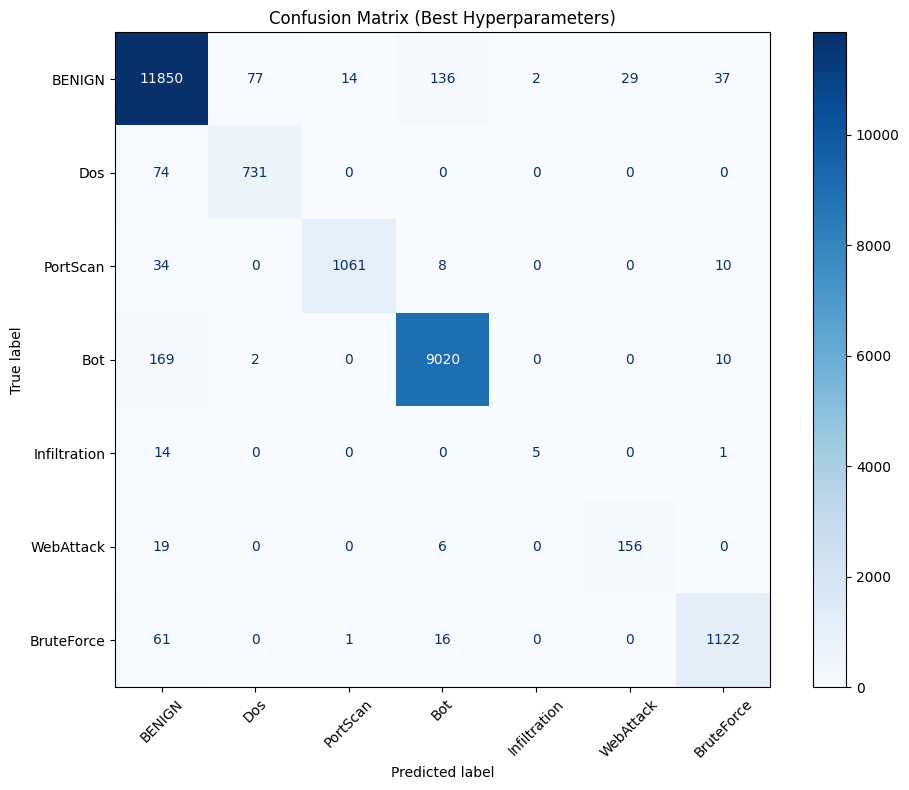

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
criterion='entropy',
max_depth=5,
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt',
random_state=42


clf.fit(X_train, y_train)

val_preds = clf.predict(X_val)
test_preds = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['BENIGN', 'Dos', 'PortScan', 'Bot', 'Infiltration', 'WebAttack', 'BruteForce']
)

print(f"\nDecision Tree with best parameters")
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("Classification Report (Test):\n", classification_report(y_test, test_preds))

# Plot decision tree
plt.figure(figsize=(50, 50))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['BENIGN', 'Dos', 'PortScan', 'Bot', 'Infiltration', 'WebAttack', 'BruteForce'],
    filled=True
)
plt.title("Decision Tree (Best Hyperparameters)")
plt.show()

# Plot confusion matrix with rotated x-axis labels
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.xticks(rotation=45)
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.tight_layout()
plt.show()

# 4. Last Test


Decision Tree with criterion='gini' and max_depth=3
Validation Accuracy: 0.8297113201427181
Test Accuracy: 0.826555848368133
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.76      0.96      0.85     12145
           1       0.77      0.03      0.06       805
           2       0.00      0.00      0.00      1113
           3       0.95      0.94      0.95      9201
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00       181
           6       0.00      0.00      0.00      1200

    accuracy                           0.83     24665
   macro avg       0.35      0.28      0.26     24665
weighted avg       0.75      0.83      0.77     24665



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


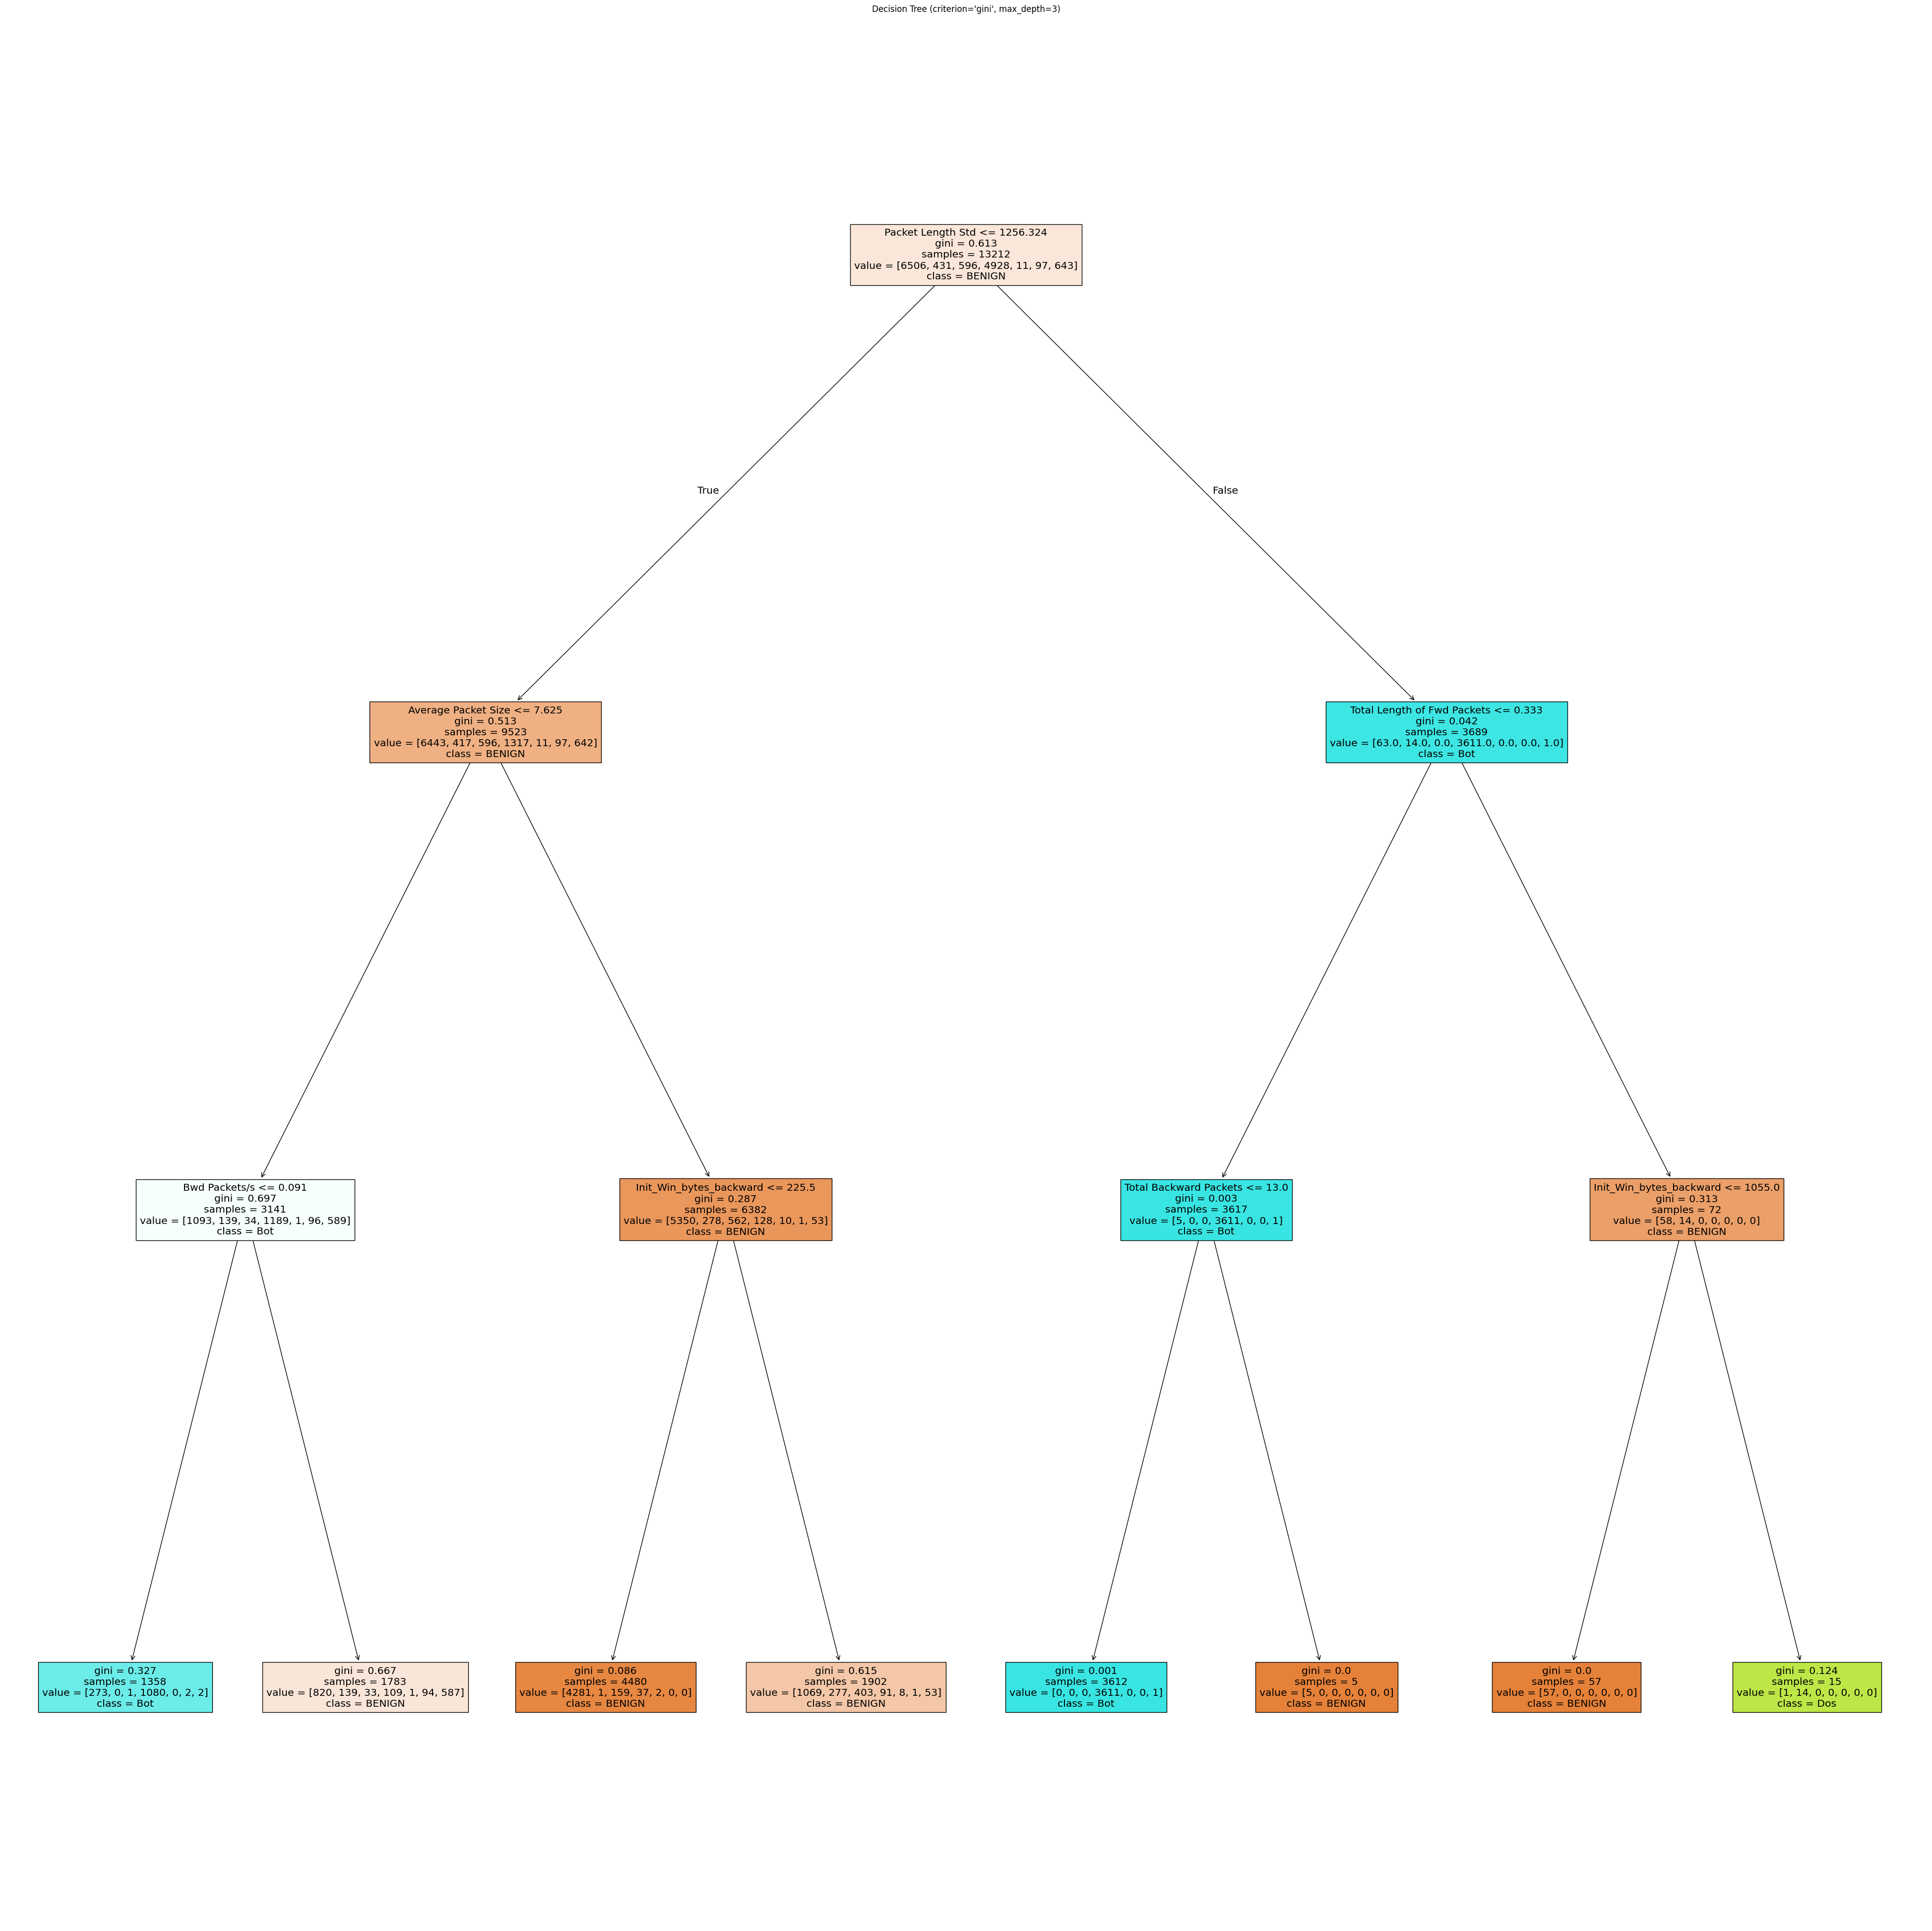

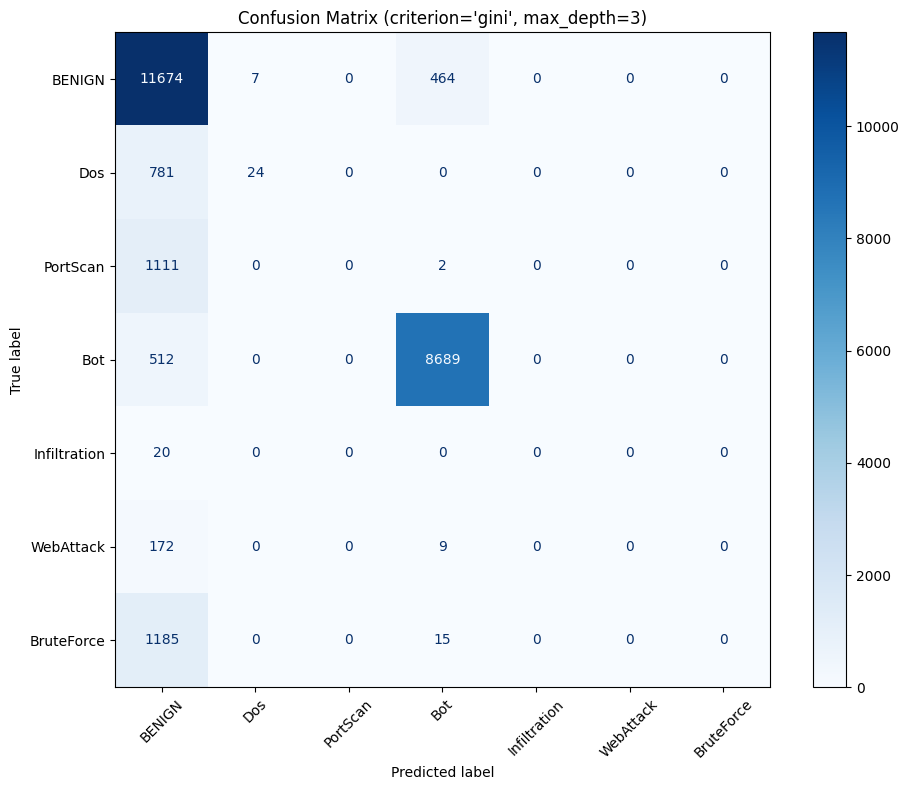


Decision Tree with criterion='gini' and max_depth=5
Validation Accuracy: 0.9412909503730132
Test Accuracy: 0.9391850800729779
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12145
           1       0.63      0.86      0.73       805
           2       0.94      0.92      0.93      1113
           3       0.99      0.93      0.96      9201
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00       181
           6       0.97      0.90      0.93      1200

    accuracy                           0.94     24665
   macro avg       0.64      0.65      0.64     24665
weighted avg       0.94      0.94      0.94     24665



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


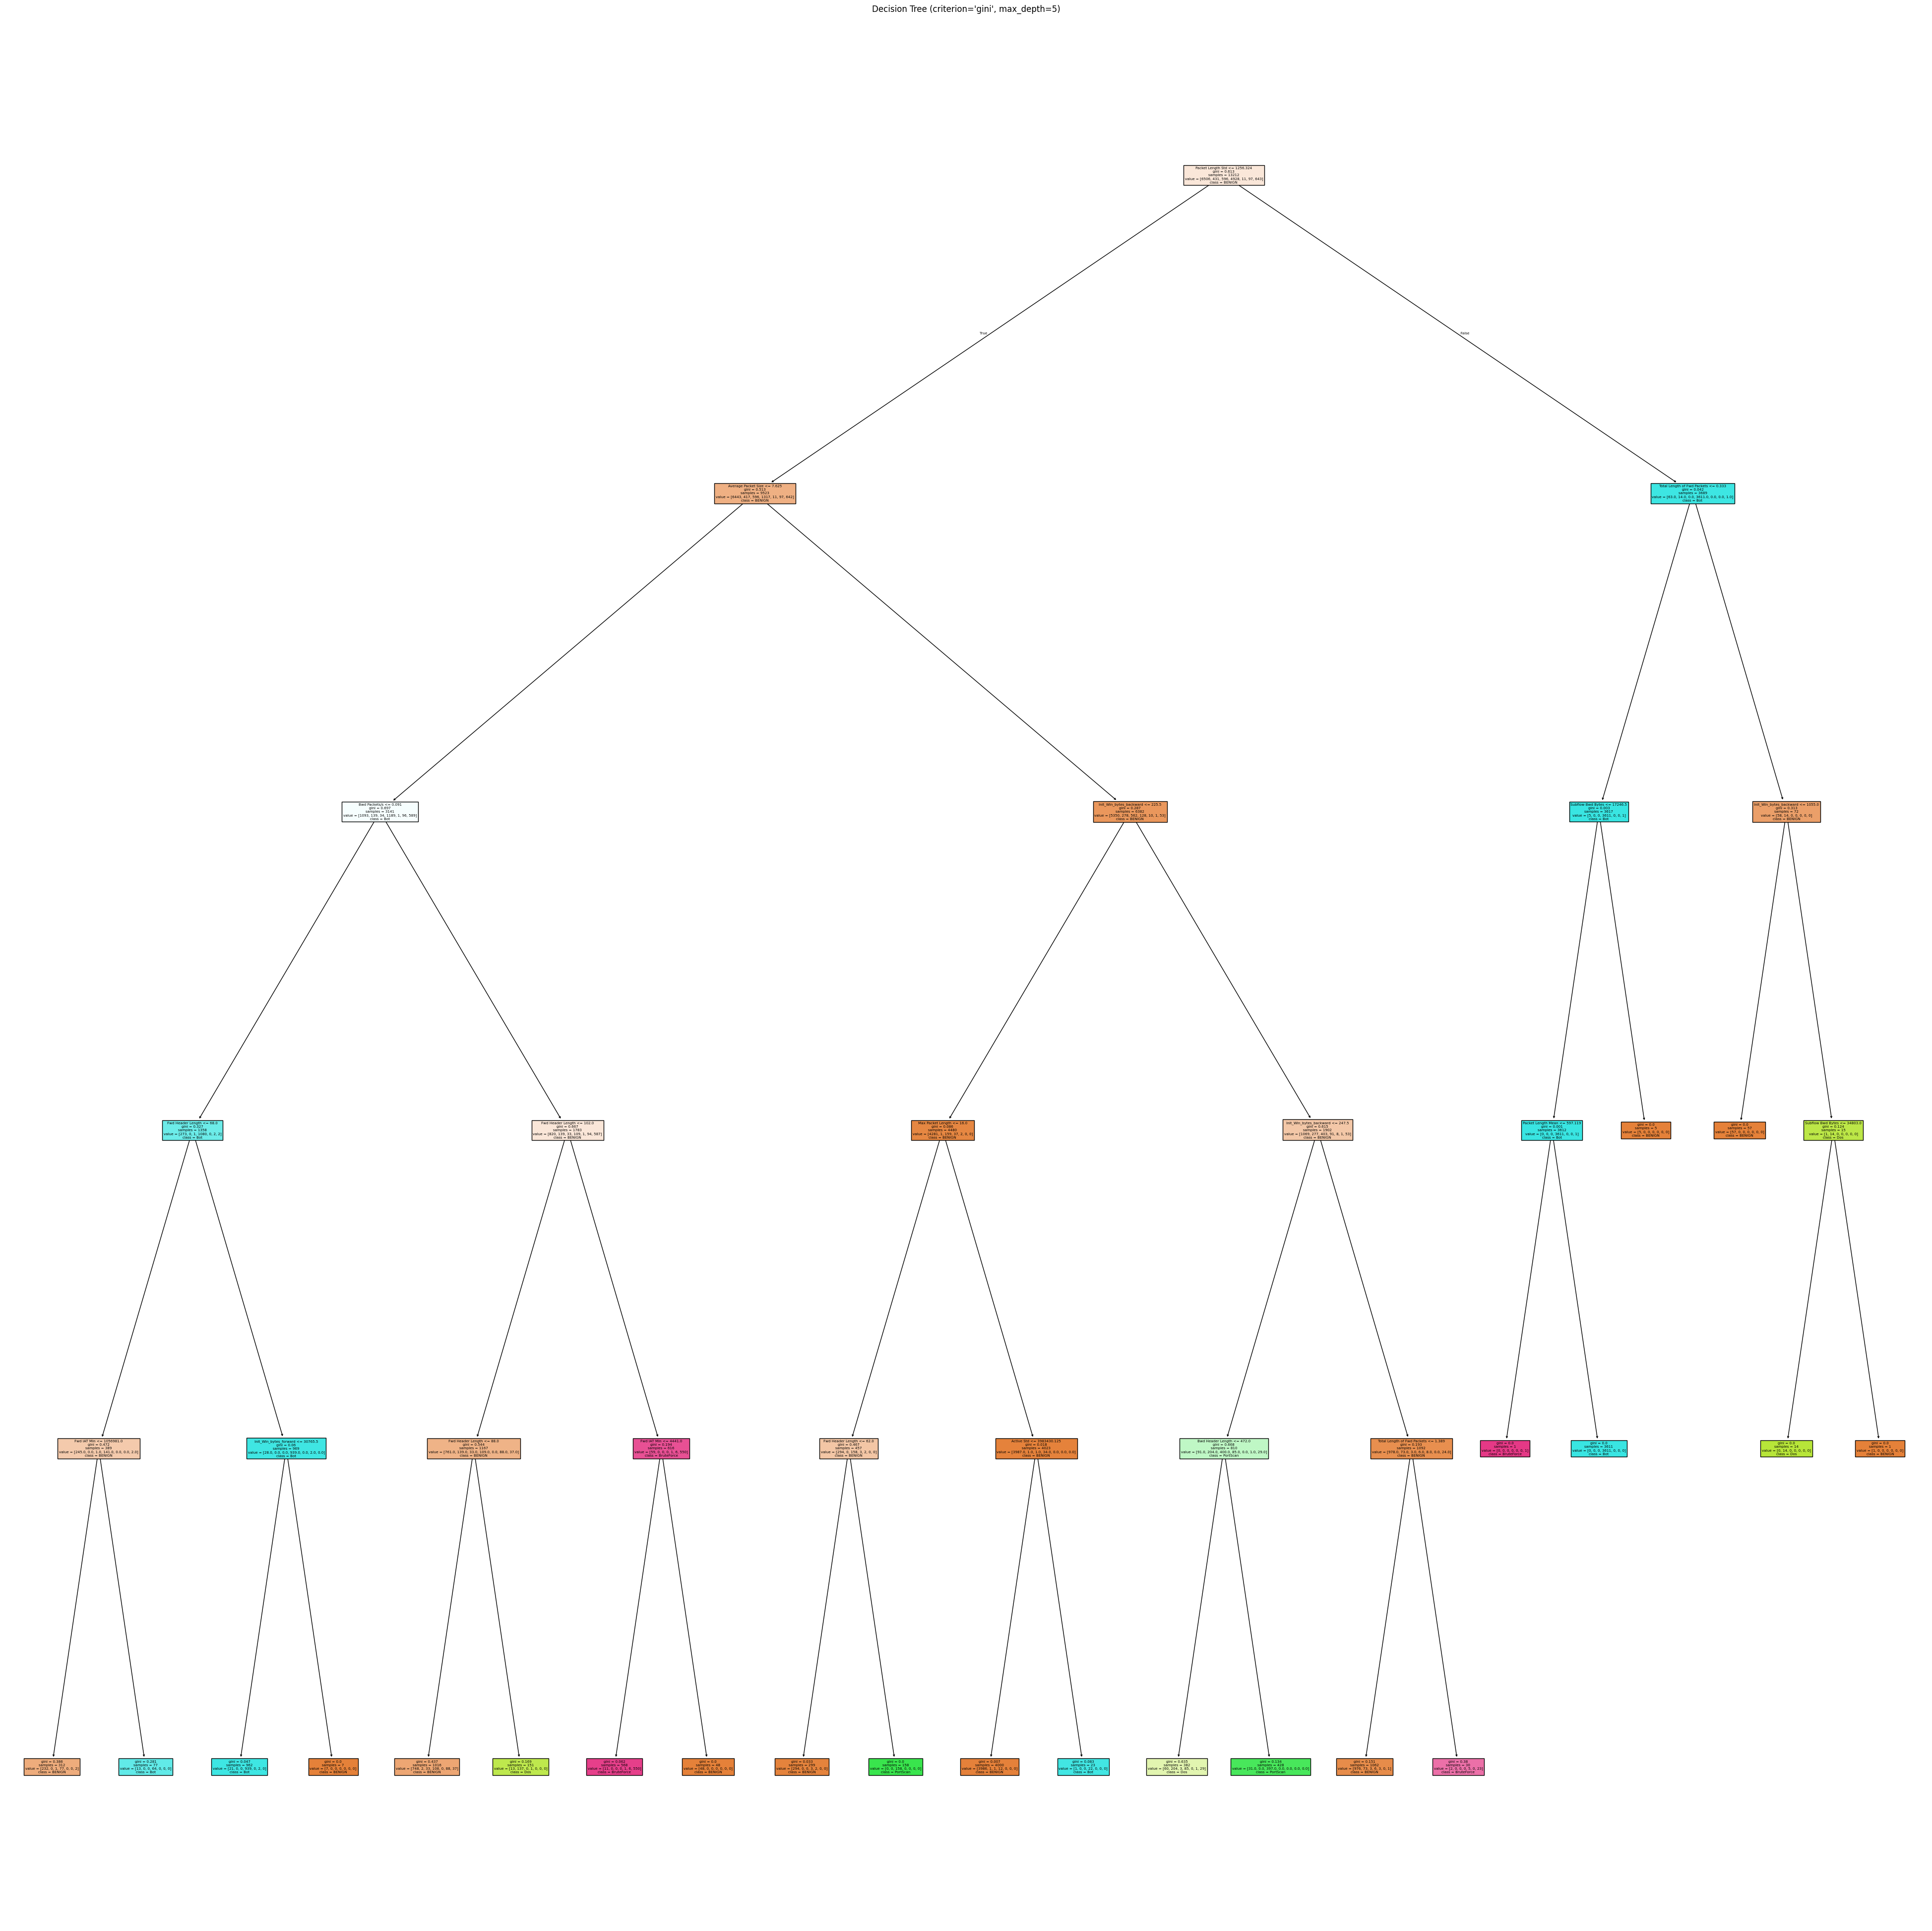

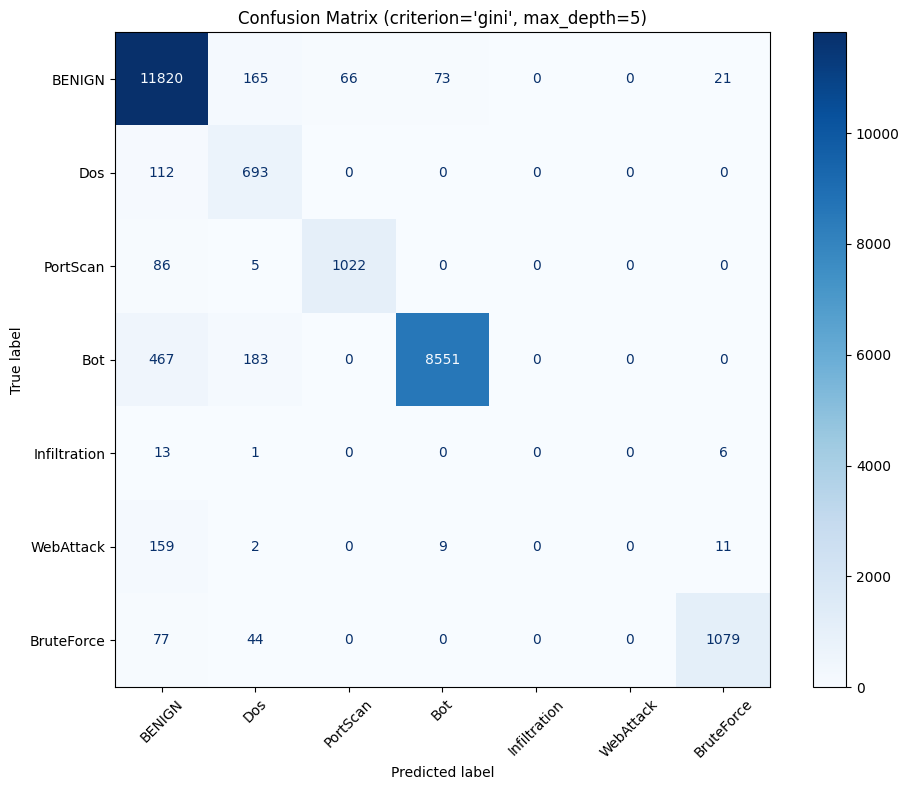


Decision Tree with criterion='entropy' and max_depth=3
Validation Accuracy: 0.8115471942912748
Test Accuracy: 0.8152442732617069
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.84      0.83      0.84     12145
           1       0.77      0.03      0.06       805
           2       0.00      0.00      0.00      1113
           3       0.86      0.97      0.91      9201
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00       181
           6       0.49      0.89      0.63      1200

    accuracy                           0.82     24665
   macro avg       0.42      0.39      0.35     24665
weighted avg       0.78      0.82      0.78     24665



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


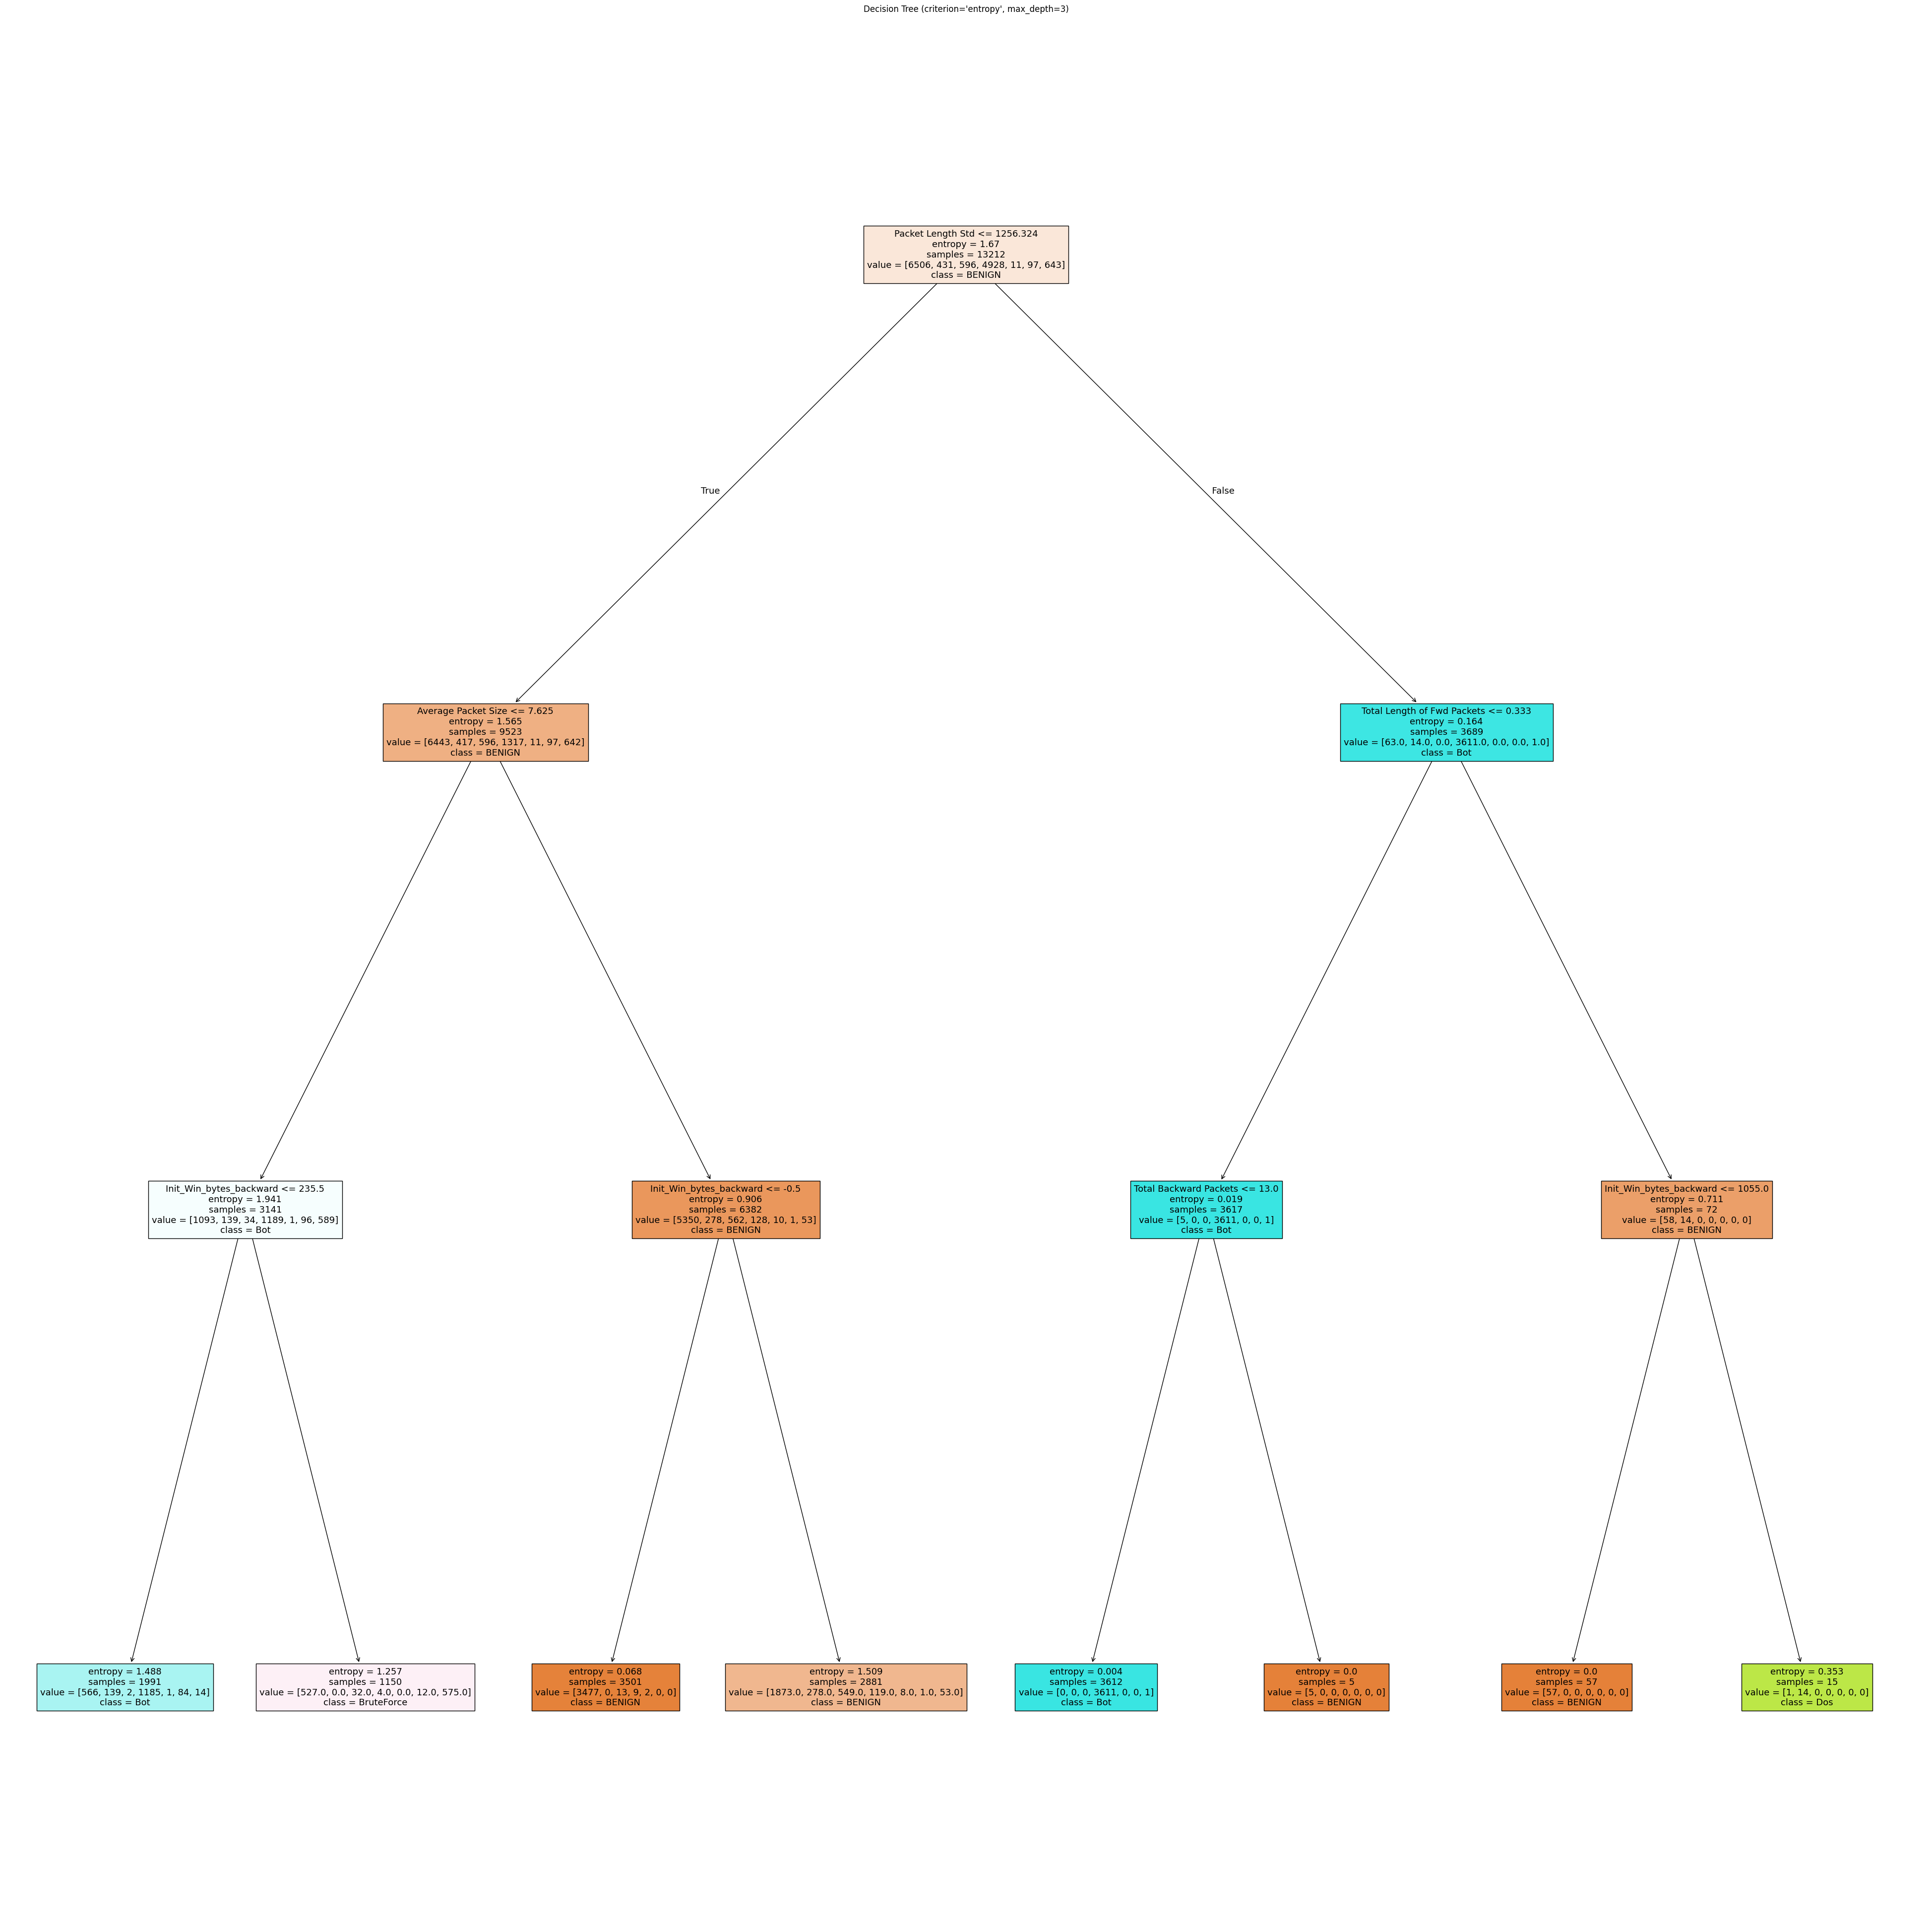

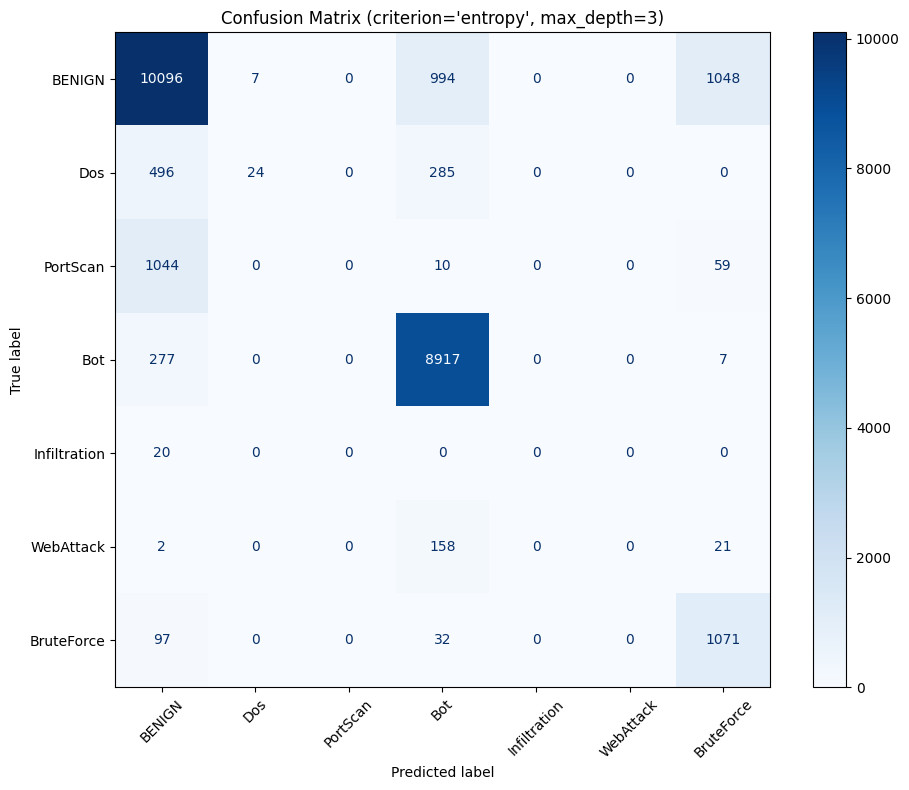


Decision Tree with criterion='entropy' and max_depth=5
Validation Accuracy: 0.9198832306195265
Test Accuracy: 0.919156699777012
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     12145
           1       0.95      0.38      0.55       805
           2       0.67      0.97      0.80      1113
           3       0.97      0.95      0.96      9201
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00       181
           6       0.97      0.86      0.91      1200

    accuracy                           0.92     24665
   macro avg       0.64      0.59      0.59     24665
weighted avg       0.92      0.92      0.91     24665



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


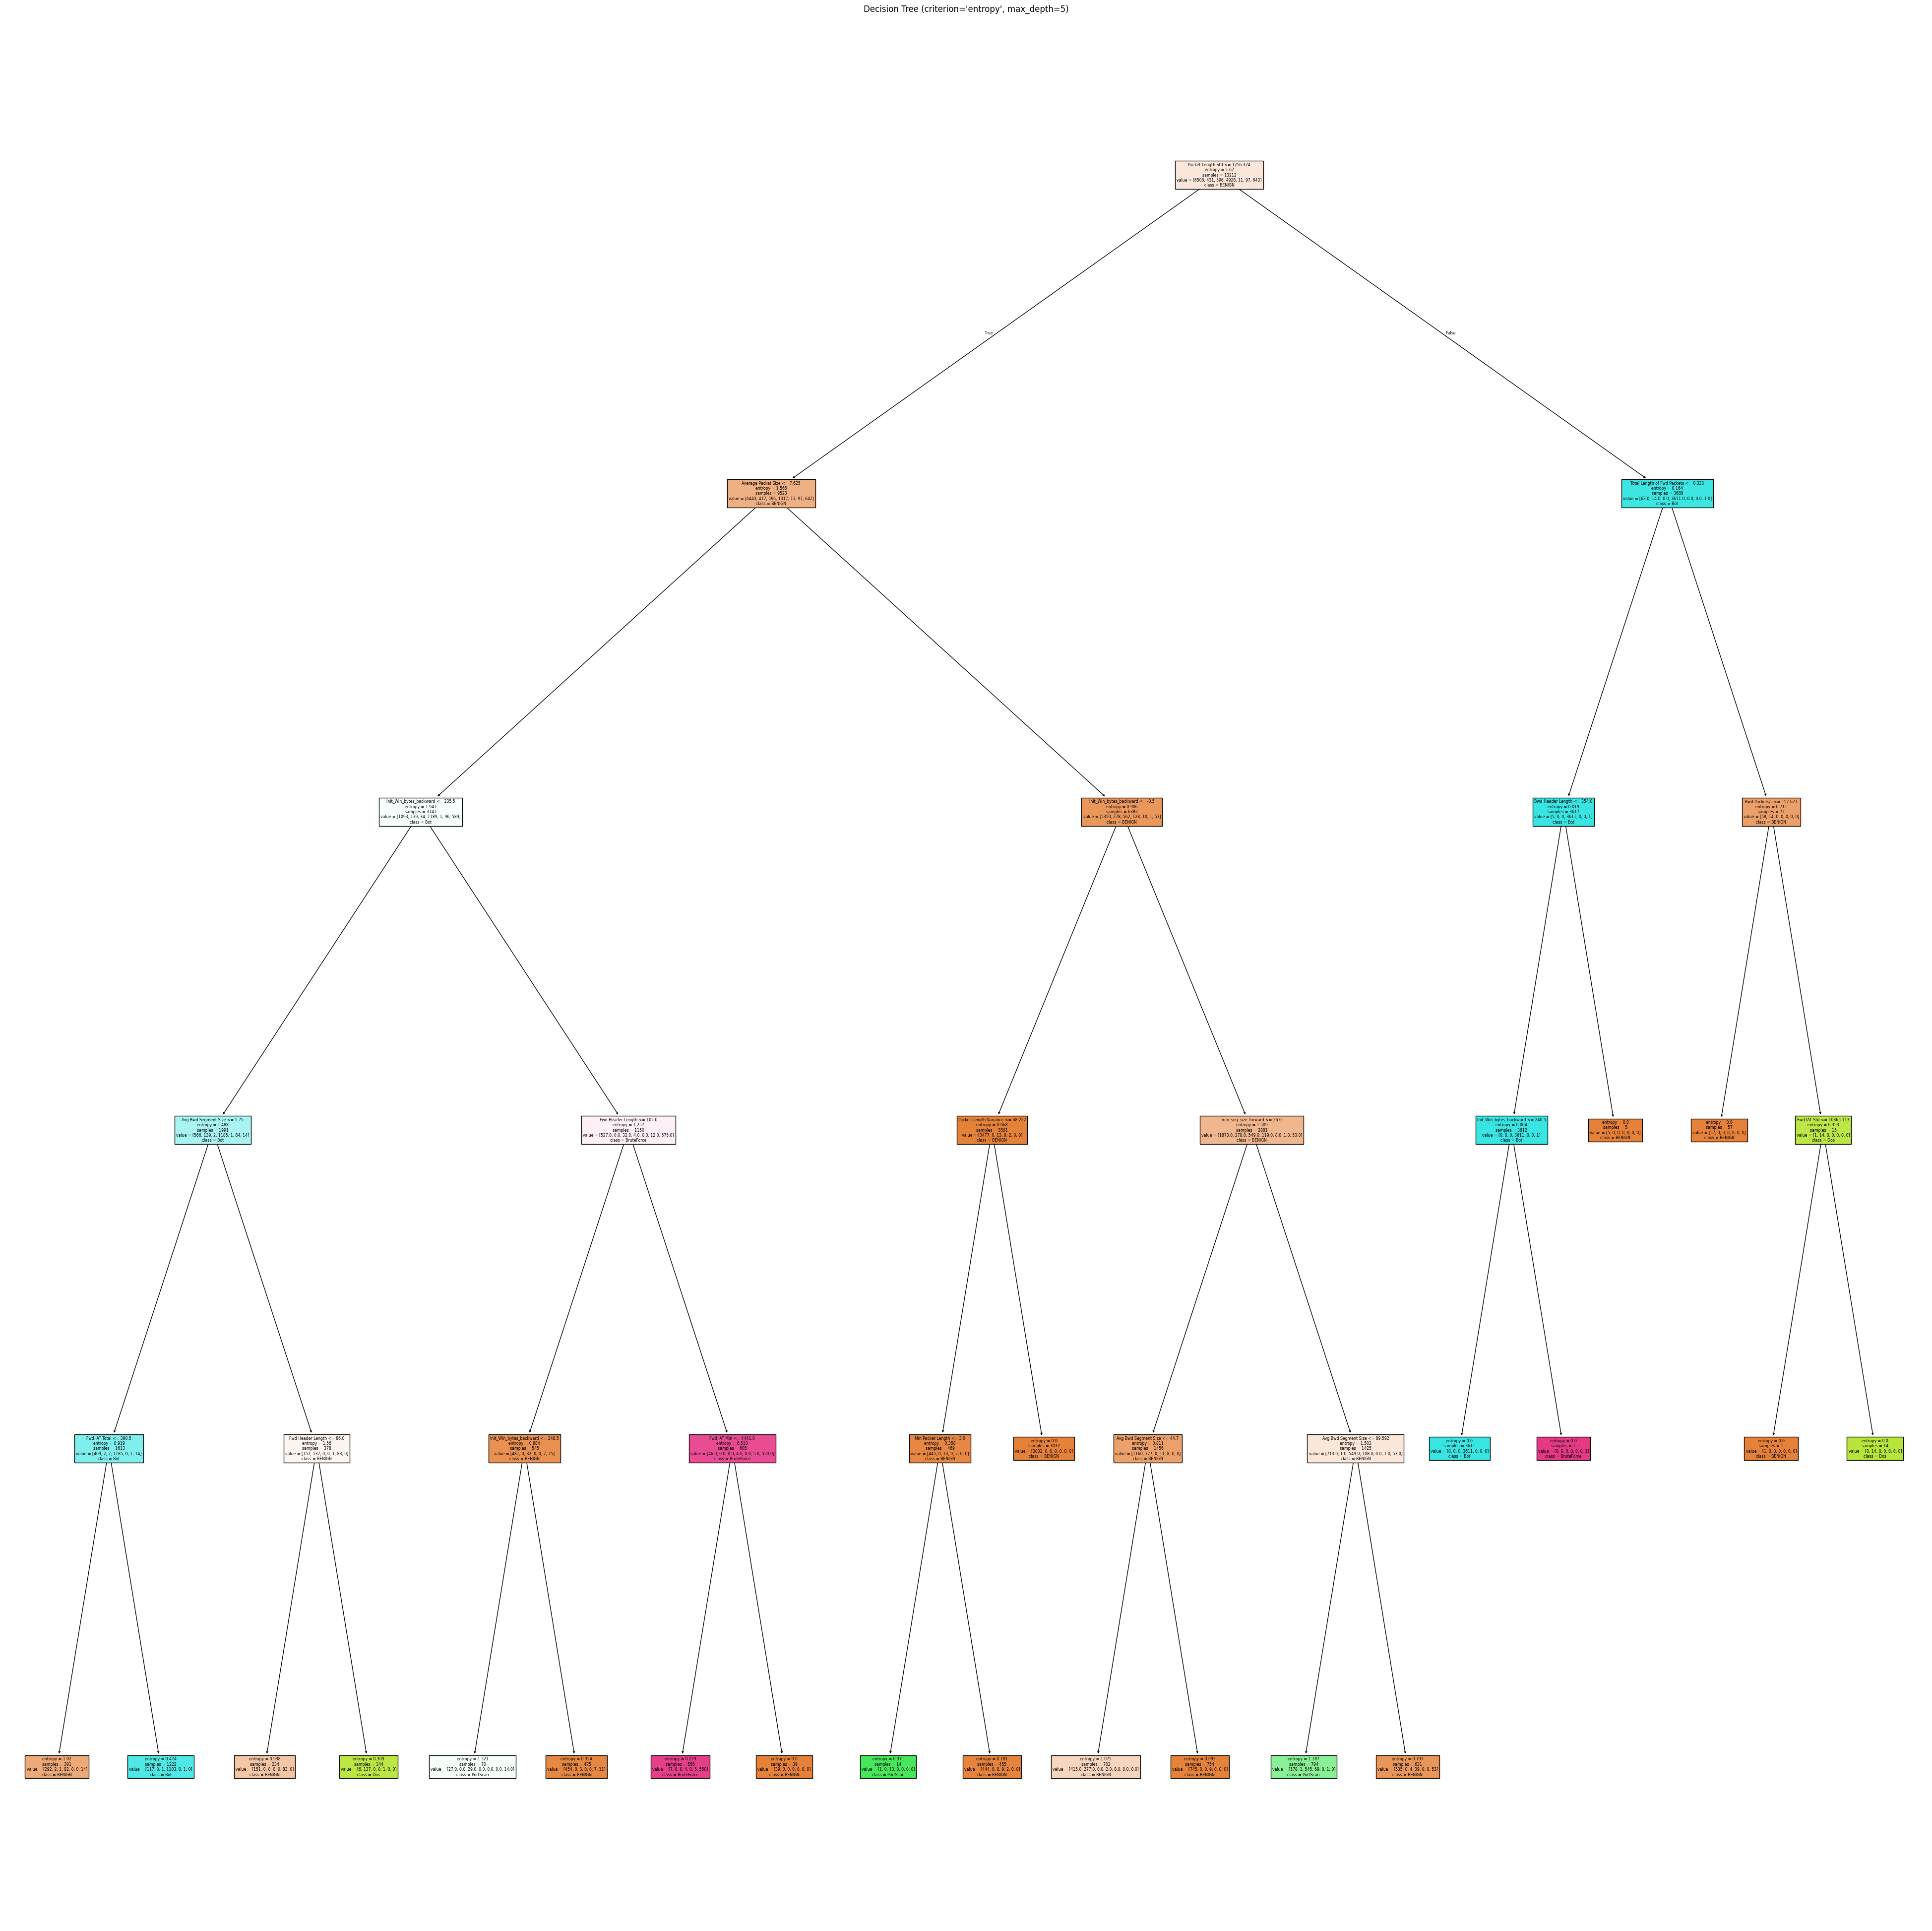

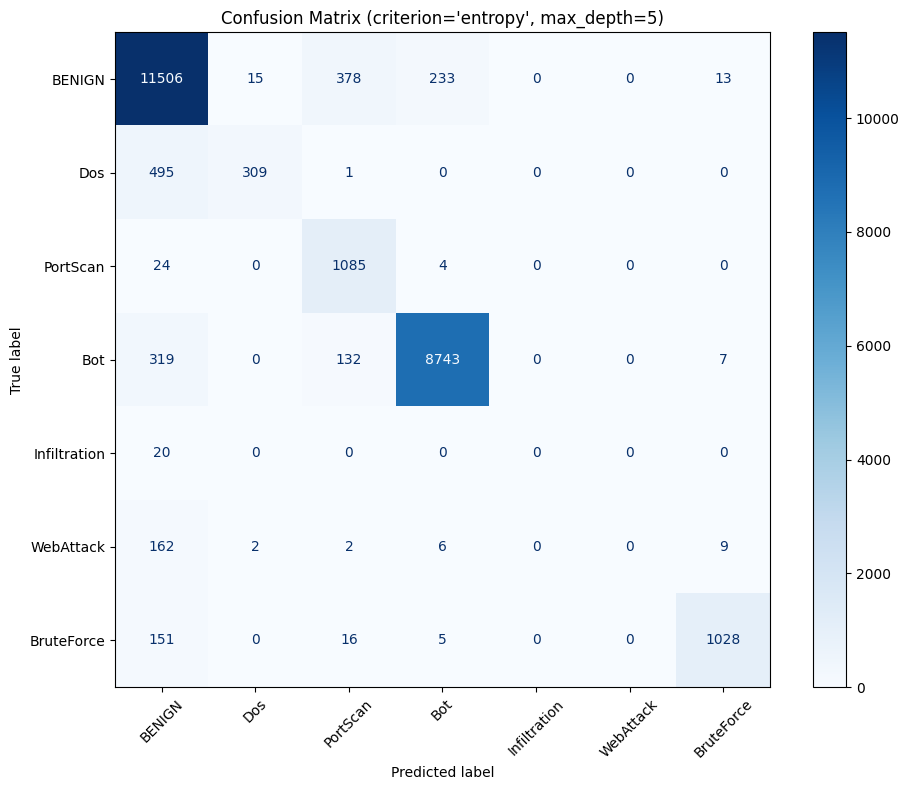

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

criteria = ['gini', 'entropy']
max_depths = [3, 5]

for criterion in criteria:
    for depth in max_depths:
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)

        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, test_preds)
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=['BENIGN', 'Dos', 'PortScan', 'Bot', 'Infiltration', 'WebAttack', 'BruteForce']
        )

        print(f"\nDecision Tree with criterion='{criterion}' and max_depth={depth}")
        print("Validation Accuracy:", accuracy_score(y_val, val_preds))
        print("Test Accuracy:", accuracy_score(y_test, test_preds))
        print("Classification Report (Test):\n", classification_report(y_test, test_preds))

        # Plot decision tree
        plt.figure(figsize=(50, 50))
        plot_tree(
            clf,
            feature_names=X.columns,
            class_names=['BENIGN', 'Dos', 'PortScan', 'Bot', 'Infiltration', 'WebAttack', 'BruteForce'],
            filled=True
        )
        plt.title(f"Decision Tree (criterion='{criterion}', max_depth={depth})")
        plt.show()

        # Plot confusion matrix with rotated x-axis labels
        fig, ax = plt.subplots(figsize=(10, 8))
        disp.plot(cmap='Blues', values_format='d', ax=ax)
        plt.xticks(rotation=45)
        plt.title(f"Confusion Matrix (criterion='{criterion}', max_depth={depth})")
        plt.tight_layout()
        plt.show()


In [39]:
# Manual Calculation of Gini Impurity for First Split

from collections import Counter

def gini_impurity(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        labels = group['Label']
        for class_val in classes:
            p = (labels == class_val).sum() / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Choose a sample feature and simulate a split
feature_to_evaluate = 'Flow Duration'
thresholds = X_train[feature_to_evaluate].unique()

print("Gini Impurity for splits on feature:", feature_to_evaluate)
for value in thresholds:
    left_group = X_train[X_train[feature_to_evaluate] <= value].copy()
    right_group = X_train[X_train[feature_to_evaluate] > value].copy()
    left_group['Label'] = y_train.loc[left_group.index, 'Label']
    right_group['Label'] = y_train.loc[right_group.index, 'Label']

    gini = gini_impurity([left_group, right_group], classes=[0, 1])
    print(f"Threshold <= {value}: Gini = {gini:.4f}")

# Let's also examine the first split chosen by the decision tree
from sklearn.tree import export_text
print("\nTree Structure (text format):")
print(export_text(clf_simple, feature_names=list(X.columns)))

print("""\nExplanation:
The feature used at the root node is chosen because it provides the lowest Gini impurity after the split.
In the example above, we manually calculated the Gini impurity for one feature across different thresholds.
The decision tree does this for all features and picks the one that reduces impurity the most at each node.""")

Streaming output truncated to the last 5000 lines.
Threshold <= 78306725: Gini = 0.7272
Threshold <= 273467: Gini = 0.6907
Threshold <= 8547423: Gini = 0.7224
Threshold <= 314318: Gini = 0.6899
Threshold <= 98656873: Gini = 0.7517
Threshold <= 94337: Gini = 0.6981
Threshold <= 1021734: Gini = 0.6975
Threshold <= 98353186: Gini = 0.7490
Threshold <= 65921627: Gini = 0.7254
Threshold <= 116395004: Gini = 0.7551
Threshold <= 5429756: Gini = 0.7144
Threshold <= 9060566: Gini = 0.7248
Threshold <= 1025014: Gini = 0.6978
Threshold <= 99709803: Gini = 0.7560
Threshold <= 39916: Gini = 0.7117
Threshold <= 253931: Gini = 0.6916
Threshold <= 100343: Gini = 0.6970
Threshold <= 52358: Gini = 0.7047
Threshold <= 193193: Gini = 0.6937
Threshold <= 1029531: Gini = 0.6984
Threshold <= 23100: Gini = 0.7290
Threshold <= 100232838: Gini = 0.7563
Threshold <= 158195: Gini = 0.6950
Threshold <= 31120: Gini = 0.7160
Threshold <= 11601248: Gini = 0.7306
Threshold <= 60942: Gini = 0.7017
Threshold <= 82880808



# The reuslt and the parameters



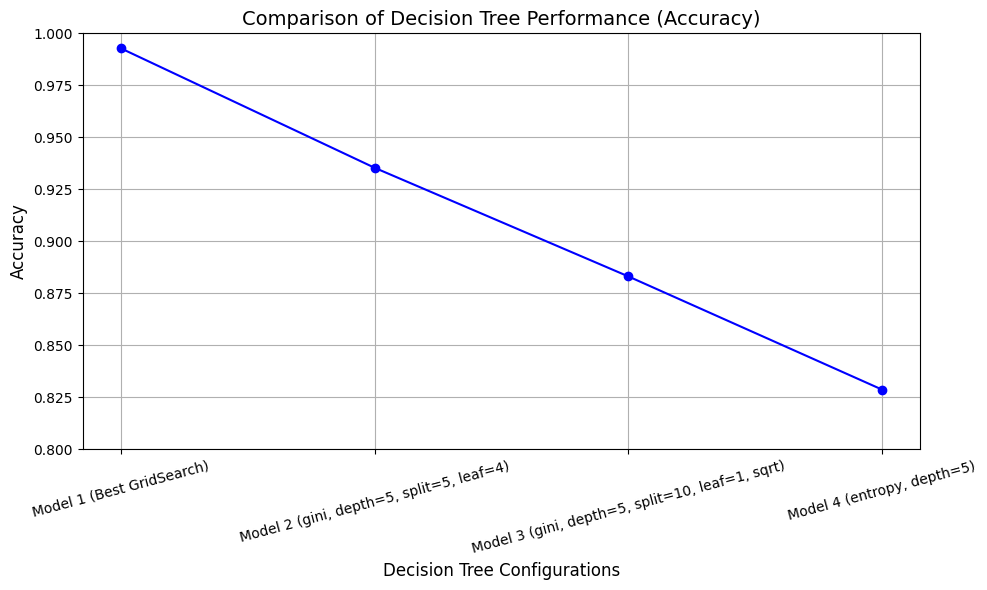

In [18]:
import matplotlib.pyplot as plt

# Simulated results
results = {
    "Model 1 (Best GridSearch)": 0.9928,
    "Model 2 (gini, depth=5, split=5, leaf=4)": 0.9354,
    "Model 3 (gini, depth=5, split=10, leaf=1, sqrt)": 0.8832,
    "Model 4 (entropy, depth=5)": 0.8288
}

# Extract labels and values
labels = list(results.keys())
accuracies = list(results.values())

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(labels, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Comparison of Decision Tree Performance (Accuracy)', fontsize=14)
plt.xlabel('Decision Tree Configurations', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

